# **Employee Retention Using Machine Learning and Data Science**

In [164]:
# import all the libraries required for the project 
# Ex:numpy,pandas,sweetviz,seaborn,matplotlib,sklearn,imblearn,ipywidgets.

In [165]:
#!pip install sweetviz
#!pip install ppscore
#!pip install imblearn
#!pip install ipywidgets

In [166]:
#numpy for numerical calculations.
import numpy
#pandas for data manipulation and analysis.
import pandas

#for exploratary data analysis.
import sweetviz

#for data visualisations
import seaborn
import matplotlib
import ppscore as pps

import sklearn
import imblearn
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_recall_curve,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#for interactive console
import ipywidgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up size of the figures
plt.rcParams['figure.figsize']=(16,5)

#setting up style of the plots.
#for more styles(plt.style.available)
plt.style.use('fivethirtyeight')


In [167]:
#READING THE DATASETS.
#Reading the data from the .csv(comma seperated variables) files.
#Train.csv to train the model.
#after learning the patterns from the Testing datasets, we then predict the TARGET variable.
#Test.csv to test the model
dodge=pd.read_csv("Train.csv")
charger=pd.read_csv("Test.csv")

In [168]:
#returns first 5 entries in the Train.csv file.
#dodge.head(6), return first 6 entries.
dodge.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [169]:
#returns first 5 entries from Test.csv file.
charger.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [170]:
dodge.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [171]:
charger.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [172]:
#shape of the Dataset
#this statement returns the number of entries present in the Train.csv and Test.csv files.
#size of the data:(no_of_entries,no_of_columns)

print("Size of the Training Data:",dodge.shape)
print("Size of the Test Data:",charger.shape)

Size of the Training Data: (54808, 14)
Size of the Test Data: (23490, 13)


##<center>Data Description</center>

<table>
    <tr>
        <td><b>Variable</b></td>
        <td><b>Definition</b></td>
    </tr>
    <tr>
        <td>employee_id</td>
        <td>Unique ID for employee<td>
    </tr>
    <tr>
        <td>department</td>
        <td>Department of employee</td>
    </tr>
    <tr>
        <td>region</td>
        <td>Region of employment (unordered)</td>
    </tr>
    <tr>
        <td>education</td>
        <td>Education Level</td>
    </tr>
    <tr>
        <td>gender</td>
        <td>Gender of Employee</td>
    </tr>
    <tr>
        <td>recruitment_channel</td>
        <td>Channel of recruitment for employee</td>
    </tr>
    <tr>
        <td>no_of_trainings</td>
        <td>no of other trainings completed in previous year on soft skills, technical skills etc.</td>
    </tr>
    <tr>
        <td>age</td>
        <td>Age of Employee</td>
    </tr>
    <tr>
        <td>previous_year_rating</td>
        <td>Employee Rating for the previous year</td>
    </tr>
    <tr>
        <td>length_of_service</td>
        <td>Length of service in years</td>
    </tr>
    <tr>
        <td>KPIs_met >80%</td>
        <td>if Percent of KPIs(Key performance Indicators) >80% then 1 else 0</td>
    </tr>
    <tr>
        <td>awards_won?</td>
        <td>if awards won during previous year then 1 else 0</td>
    </tr>
    <tr>
        <td>avg_training_score</td>
        <td>Average score in current training evaluations</td>
    </tr>
    <tr>
        <td>is_promoted	(Target)</td>
        <td>Recommended for promotion</td>
    </tr>
</table>

In [173]:
#Determining the datatype of the columns.  
dodge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [174]:
charger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [175]:
#This statement helps to pick our desired style for the figures.
#eg:ln[22]
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [176]:
#returns the count of employees either promoted or not.
dodge["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

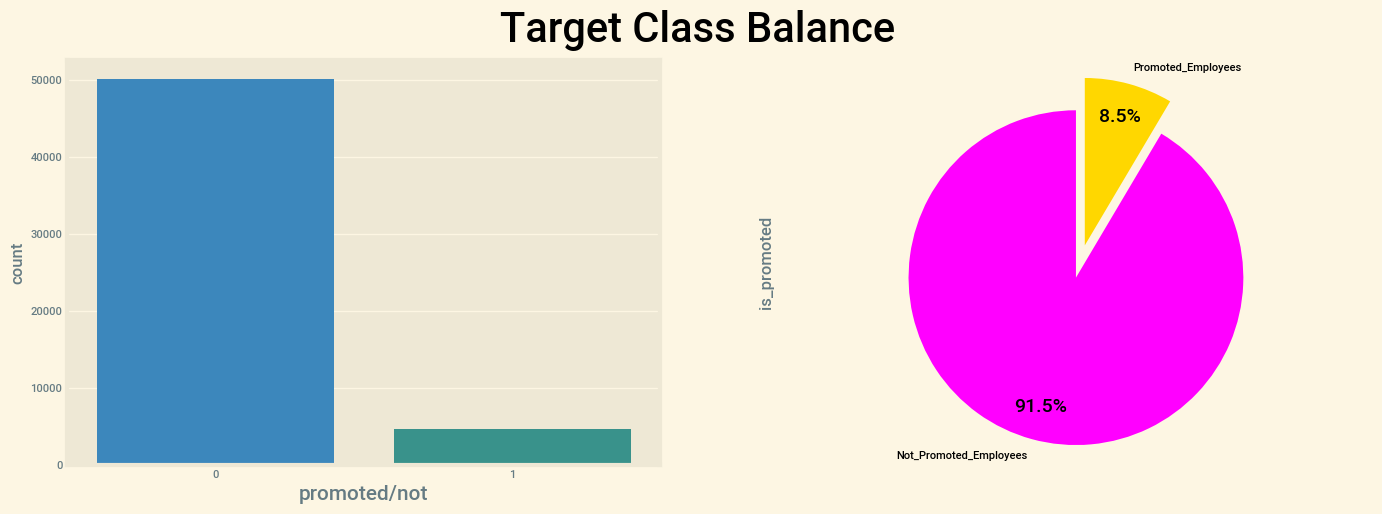

In [177]:
#PLOTING TARGET CLASS BALANCE FOR THE TARGET ATTRIBUTE(is_promoted)
#size and style for plotting the graph and pie chart.
plt.rcParams["figure.figsize"]=(15,5)
plt.style.use("Solarize_Light2")



#subplot(no_of_rows(1),no_of_columns(2),position_of_the_chart(1/2))
plt.subplot(1,2,1)
#ploting a graph regarding the target atrribute(is_promoted)
#sns=seaborn data visualisation library.
sns.countplot(dodge["is_promoted"])
#labelling the x axis with promoted/not.
plt.xlabel("promoted/not",fontsize=15)



#ploting a pie chart with respect to is_promoted attribute.
plt.subplot(1,2,2)
#plot kind=pie chart,
#explode=taking a piece of pie out i.e taking (0,0.1)% from the pie out, 
#autopct=decimal points after the number 2.52,6.78 etc (%.1f%% (%% is used to give percent symbol after the decimal points))
#startangle=it can be any angle from 0-90, 
#labels = the names we wanted to give for the pieces of the pie("Not_Promoted_Employees","Promoted_Employees"),
#shadow=to give a shadow to the pie at the bottom(True-shadow out,False-no shadow), 
#pctdistance=distance between the points. 
dodge["is_promoted"].value_counts().plot(kind="pie",explode=[0,0.2],
                                         autopct="%.1f%%",
                                         startangle=90,
                                         colors=["magenta","gold"],
                                         labels=["Not_Promoted_Employees","Promoted_Employees"],
                                         shadow=False,
                                         pctdistance=0.8)

#hides the axis,borders and whitespaces.
plt.axis("equal")

#Adds a CENTERED TEXT/TITLE to the figure.
plt.suptitle("Target Class Balance",fontsize=30)

#plt.show() is used to display the figure.
plt.show()

As we can see there is a Huge Data Imbalance between the promoted employees and those who are not, 
So inorder to balance the target classes, we need to balance the target class.
whenever we use a machine learning model there will be a high chance of getting poor results and the results can be biased to the class having higher distributioin.
So inorder to this we can use something called RESAMPLING METHODS.
* __UNDERSAMPLING__:It is the method of eliminating the values from the higher class, so as to bring the higher class to that of smaller one and make it EQUAL.
* __OVERSAMPLING__:Its is a method of bringing the lower class equal to that of upper class, i.e Adding the values so as to make it equal to that of higher class.

In [178]:
report=sweetviz.compare([dodge,"Training_data"],[charger,"Testing_data"],"is_promoted")
report.show_html("my_report.html")


Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Checking statistics for the dataset..
Descriptive Statistics..
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [179]:
#this return the stats for each numerical columns present in the dataset.
dodge.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [180]:
# this returns the stats for the categorical columns.
#count-the count of the records.
#unique-no of unique elements present in a particular column.
#top-it refers to which unique element/department/any other categorical column is greater apart from other unique elements.
#eg:out of 9 different departments sales&marketing has higher no of records compared to other elements present in department.
#freq-the number of employees present in the list that has toped in a categorical column.
dodge.describe(include="object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [181]:
#Inorder to get more detailed view for the stats of numerical columns..
#the “:” Represents to select all rows.
# the integer always signifies the column which we should consider and print. 
# : represents default like select all the rows/columns to print/display.
dodge.iloc[:,1:].describe().style.background_gradient(cmap='copper')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## OUTLIERS
__Outlier can be defined as extremly low or extremly high values in our dataset.__
* it is better to use mean if there is no outlier.
* it is better to use median when there is ouliers in our dataset
* we use mode when we have a categorical variables/values.

## Note
* So our dataset dose'nt consist of any outliers but it consists of missing values that we are going to treat further.
* the average training score for most of the Employee lie between 40 to 100, which is a very good distribution, also the mean is 60.
* Also, the Length of service is not having very disruptive values, so we can keep them for model training, They are'nt going to harm us a lot.

In [182]:
#Now, Lets make an interactive function to check the statistics of these numerical columns at a time.
#in order to use the ipywidgets we need to import something called as @interact before writing any ipywidget function.
#ipywidgtes -> interactive widgets for better understanding and visualisation

@interact
def check(column = list(dodge.select_dtypes('number').columns[0:8])):
    print("Maximum Value :", dodge[column].max())
    print("Minimum Value :", dodge[column].min())
    print("Mean : {0:.2f}".format(dodge[column].mean()))
    print("Median :", dodge[column].median())
    print("Standard Deviation :  {0:.2f}".format(dodge[column].std()))

interactive(children=(Dropdown(description='column', options=('employee_id', 'no_of_trainings', 'age', 'previo…

In [183]:
# dodge.select_dtypes('object').columns[0:8]
dodge.select_dtypes('number').columns[0:8]

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [184]:
# here object refers to categorical columns/non_numerical columns.
dodge.select_dtypes(include = 'object').head()
# dodge.select_dtypes('number').head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


## TREATMENT OF MISSING VALUES
* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can occur due to various reasons, such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    * if a column has more missing values than the values it actually has, we can completely delete that column in that case or vice versa.
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables. 

In [185]:
# calculating sum() of all the null values in the dodge file.
dodge_null = dodge.isnull().sum()
# calculating the percentage of null values in dodge(train) data.
# dodge.shape[0] represents the number of rows, shape[1] represents number of columns.
dodge_null_percent = (dodge_null/dodge.shape[0] * 100).round(2)

# calculating sum() of all the null values in the charger(test) file.
charger_null = charger.isnull().sum()
# calculating the percentage of null values in charger(test) data.
# charger.shape[0] represents the number of rows, shape[1] represents number of columns.
charger_null_percent = (charger_null/charger.shape[0] * 100).round(2)

#print(dodge_null,dodge_null_percent,charger_null,charger_null_percent)
# here we merge all the samll df into one by concat([],axis=1,) with keys/ index as ['dodge_null','dodge_null_percent','charger_null','charger_null_percent'].
# axis = 1 refers our result to be in the form of columns, axis = 0 refers to be our result to be in the form of rows.
total_stats = pd.concat([dodge_null,dodge_null_percent,charger_null,charger_null_percent],axis = 1, keys = ['dodge_null','dodge_null_percent','charger_null','charger_null_percent'])
total_stats.style.bar(color = 'magenta')

,dodge_null,dodge_null_percent,charger_null,charger_null_percent
employee_id,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
region,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
gender,0,0.000000,0.000000,0.000000
recruitment_channel,0,0.000000,0.000000,0.000000
no_of_trainings,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
previous_year_rating,4124,7.520000,1812.000000,7.710000
length_of_service,0,0.000000,0.000000,0.000000


In [186]:
# here ford hold the column names which consists of null values.
# dtypes - its selects all the columns in the dodge(train) dataset, select_dtype('number'/'object') selects particular type of data we want to display.
# .any() is used to find whether there are any null values in the columns/ not, if there is any null value it will return true or false.
ford = dodge.dtypes[dodge.isnull().any()]
print(ford)

education                object
previous_year_rating    float64
dtype: object


In [187]:
# imputing missing values in columns education and previous_year_rating in dodge(train) data, by using mode()
# fillna() is used to fill the missing values using mode() data.
dodge['education'] = dodge['education'].fillna(dodge['education'].mode()[0])
#dodge['education'].isnull().any()
dodge['previous_year_rating'] = dodge['previous_year_rating'].fillna(dodge['previous_year_rating'].mode()[0])
#dodge['previous_year_rating'].isnull().any()
print("Number of Missing values in dodge(train) data is:", dodge.isnull().sum().sum())

Number of Missing values in dodge(train) data is: 0


In [188]:
# imputing missing values in columns education and previous_year_rating in charger(test) data, by using mode()
# fillna() is used to fill the missing values using mode() data.
charger['education'] = charger['education'].fillna(charger['education'].mode()[0])
#charger['education'].isnull().any()
charger['previous_year_rating'] = charger['previous_year_rating'].fillna(charger['previous_year_rating'].mode()[0])
#charger['previous_year_rating'].isnull().any()
print("Number of Missing values in charger(test) data is:", charger.isnull().sum().sum())

Number of Missing values in charger(test) data is: 0


## Outlier Detection.
Outliers in the dataset are referred as the huge difference between the range of values present in the dataset.
Now, this outliers can result in the poor performance of our predictive model and can result in incorrect results.
there are several methods in order to solve these outliers issues.
* Visualization.
* Standard Deviation
* Interquantile range


In [189]:
# lets us analyze the numerical columns in dodge(train) dataset.
dodge.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [190]:
## **Exploratory Data Analysis**

In [191]:
## Outlier Detection Using BOX PLOTS On Numerical and Categorical Columns.

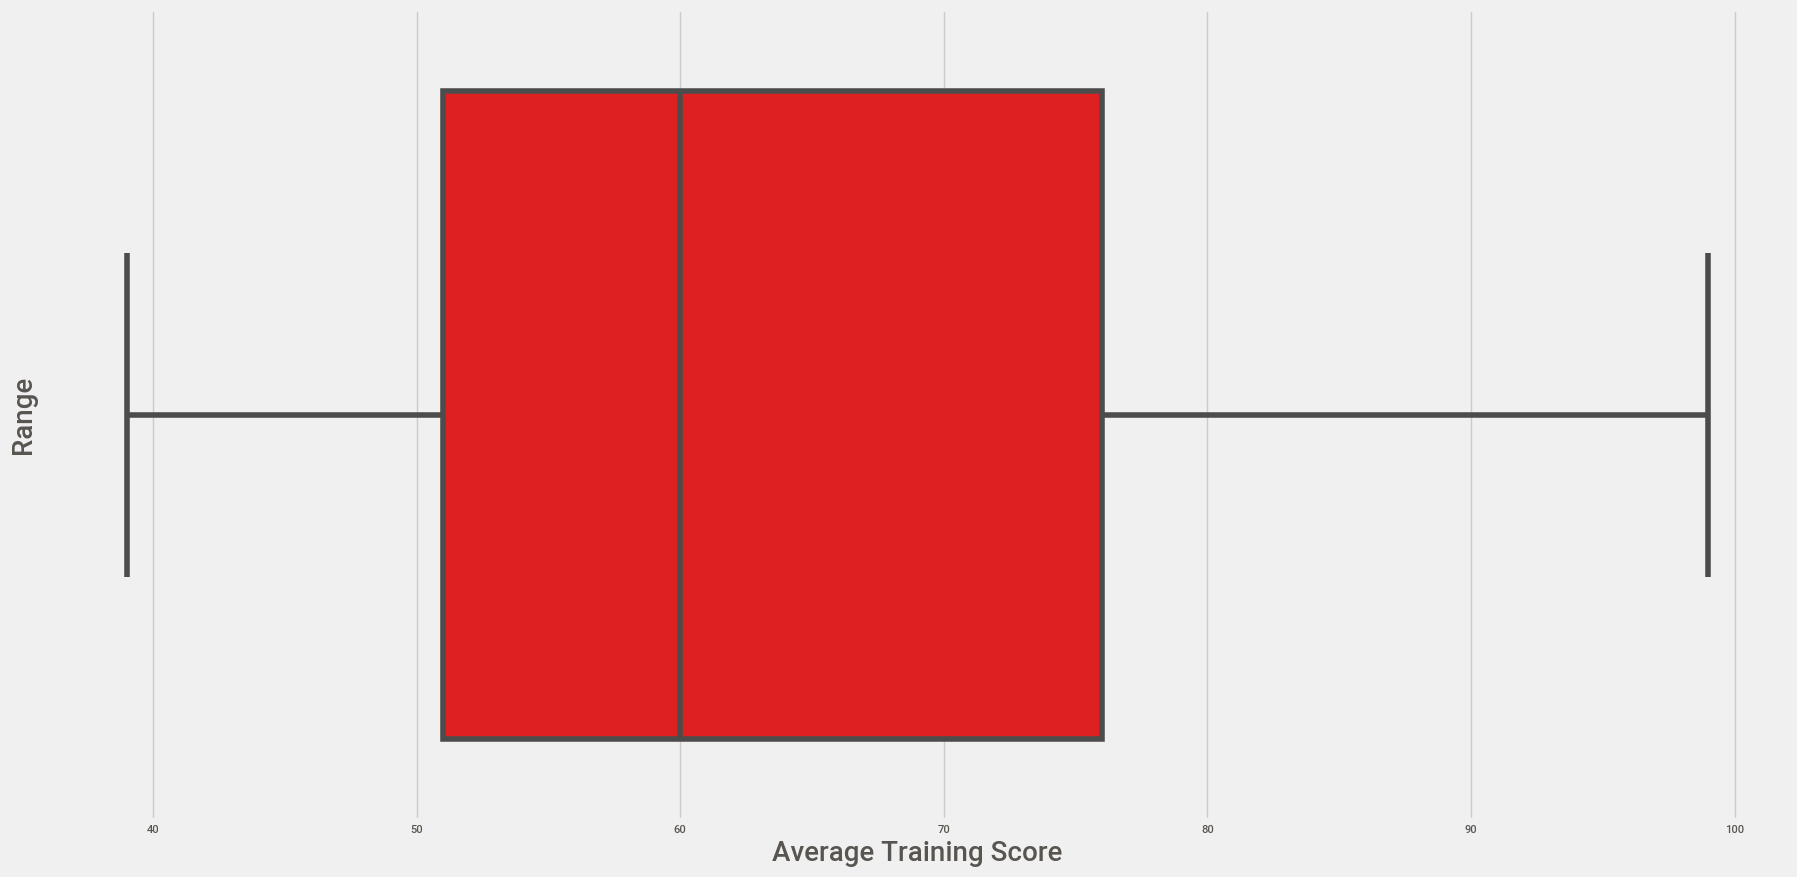

In [192]:
# let us analyze each column and see whether it contains ouliers or not.
# lets check the boxplots for the columns.
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

# Box Plot for dodge['avg_training_score']
plt.subplot(1,1,1)
sns.boxplot(dodge['avg_training_score'],color='red')
plt.xlabel('Average Training Score',fontsize = 20)
plt.ylabel('Range',fontsize = 20)

plt.show()

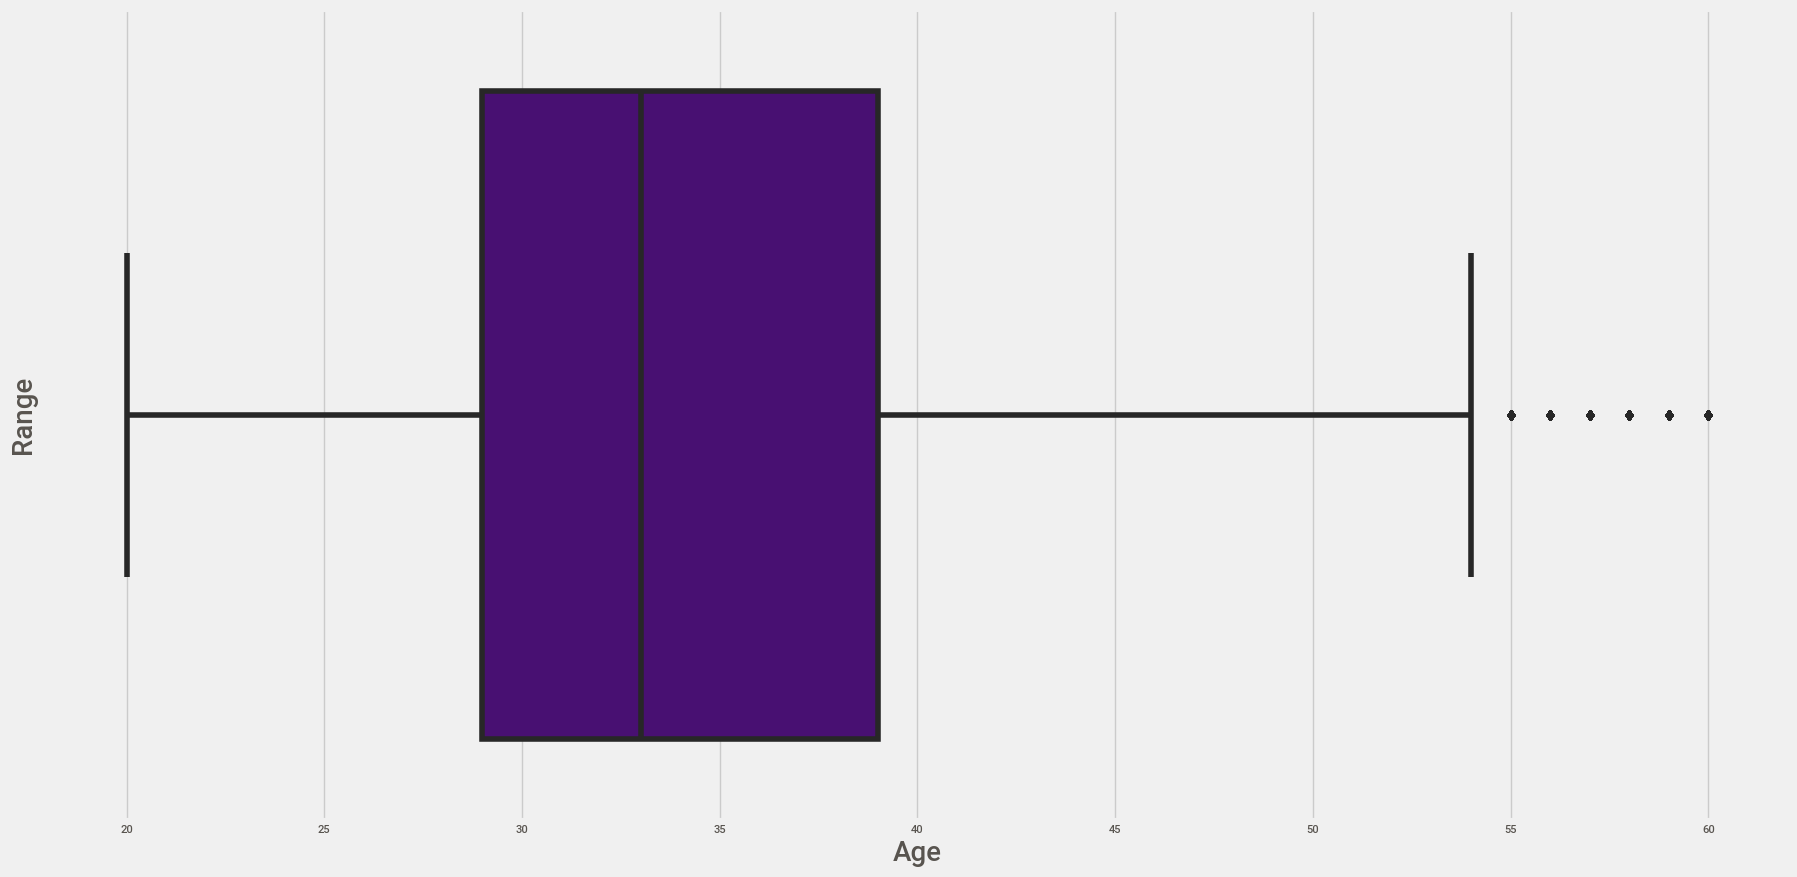

In [193]:
# Box Plot for dodge['age']
plt.subplot(1,1,1)
sns.boxplot(dodge['age'],color='Indigo')
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Range',fontsize = 20)

plt.show()

# Univariate Analysis.
Univariate Analysis is a simplest form of statistical analysis, which is used to analyse the columns in the dataset.
#### Univariate refers to analysing single columns(variable) at a time.
* Pie Charts -> these are used when we have very few categories in our categorical columns in our dataset.(eg.kpis met, awards won, previous year rating)
* Count Plots -> these are used when we have more number of categories in our categorical columns in our dataset.(eg.age, no_of_trainings, region, department etc)

In [194]:
dodge.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [195]:
## Analysing Categorical Columns Using PIE CHARTS. 

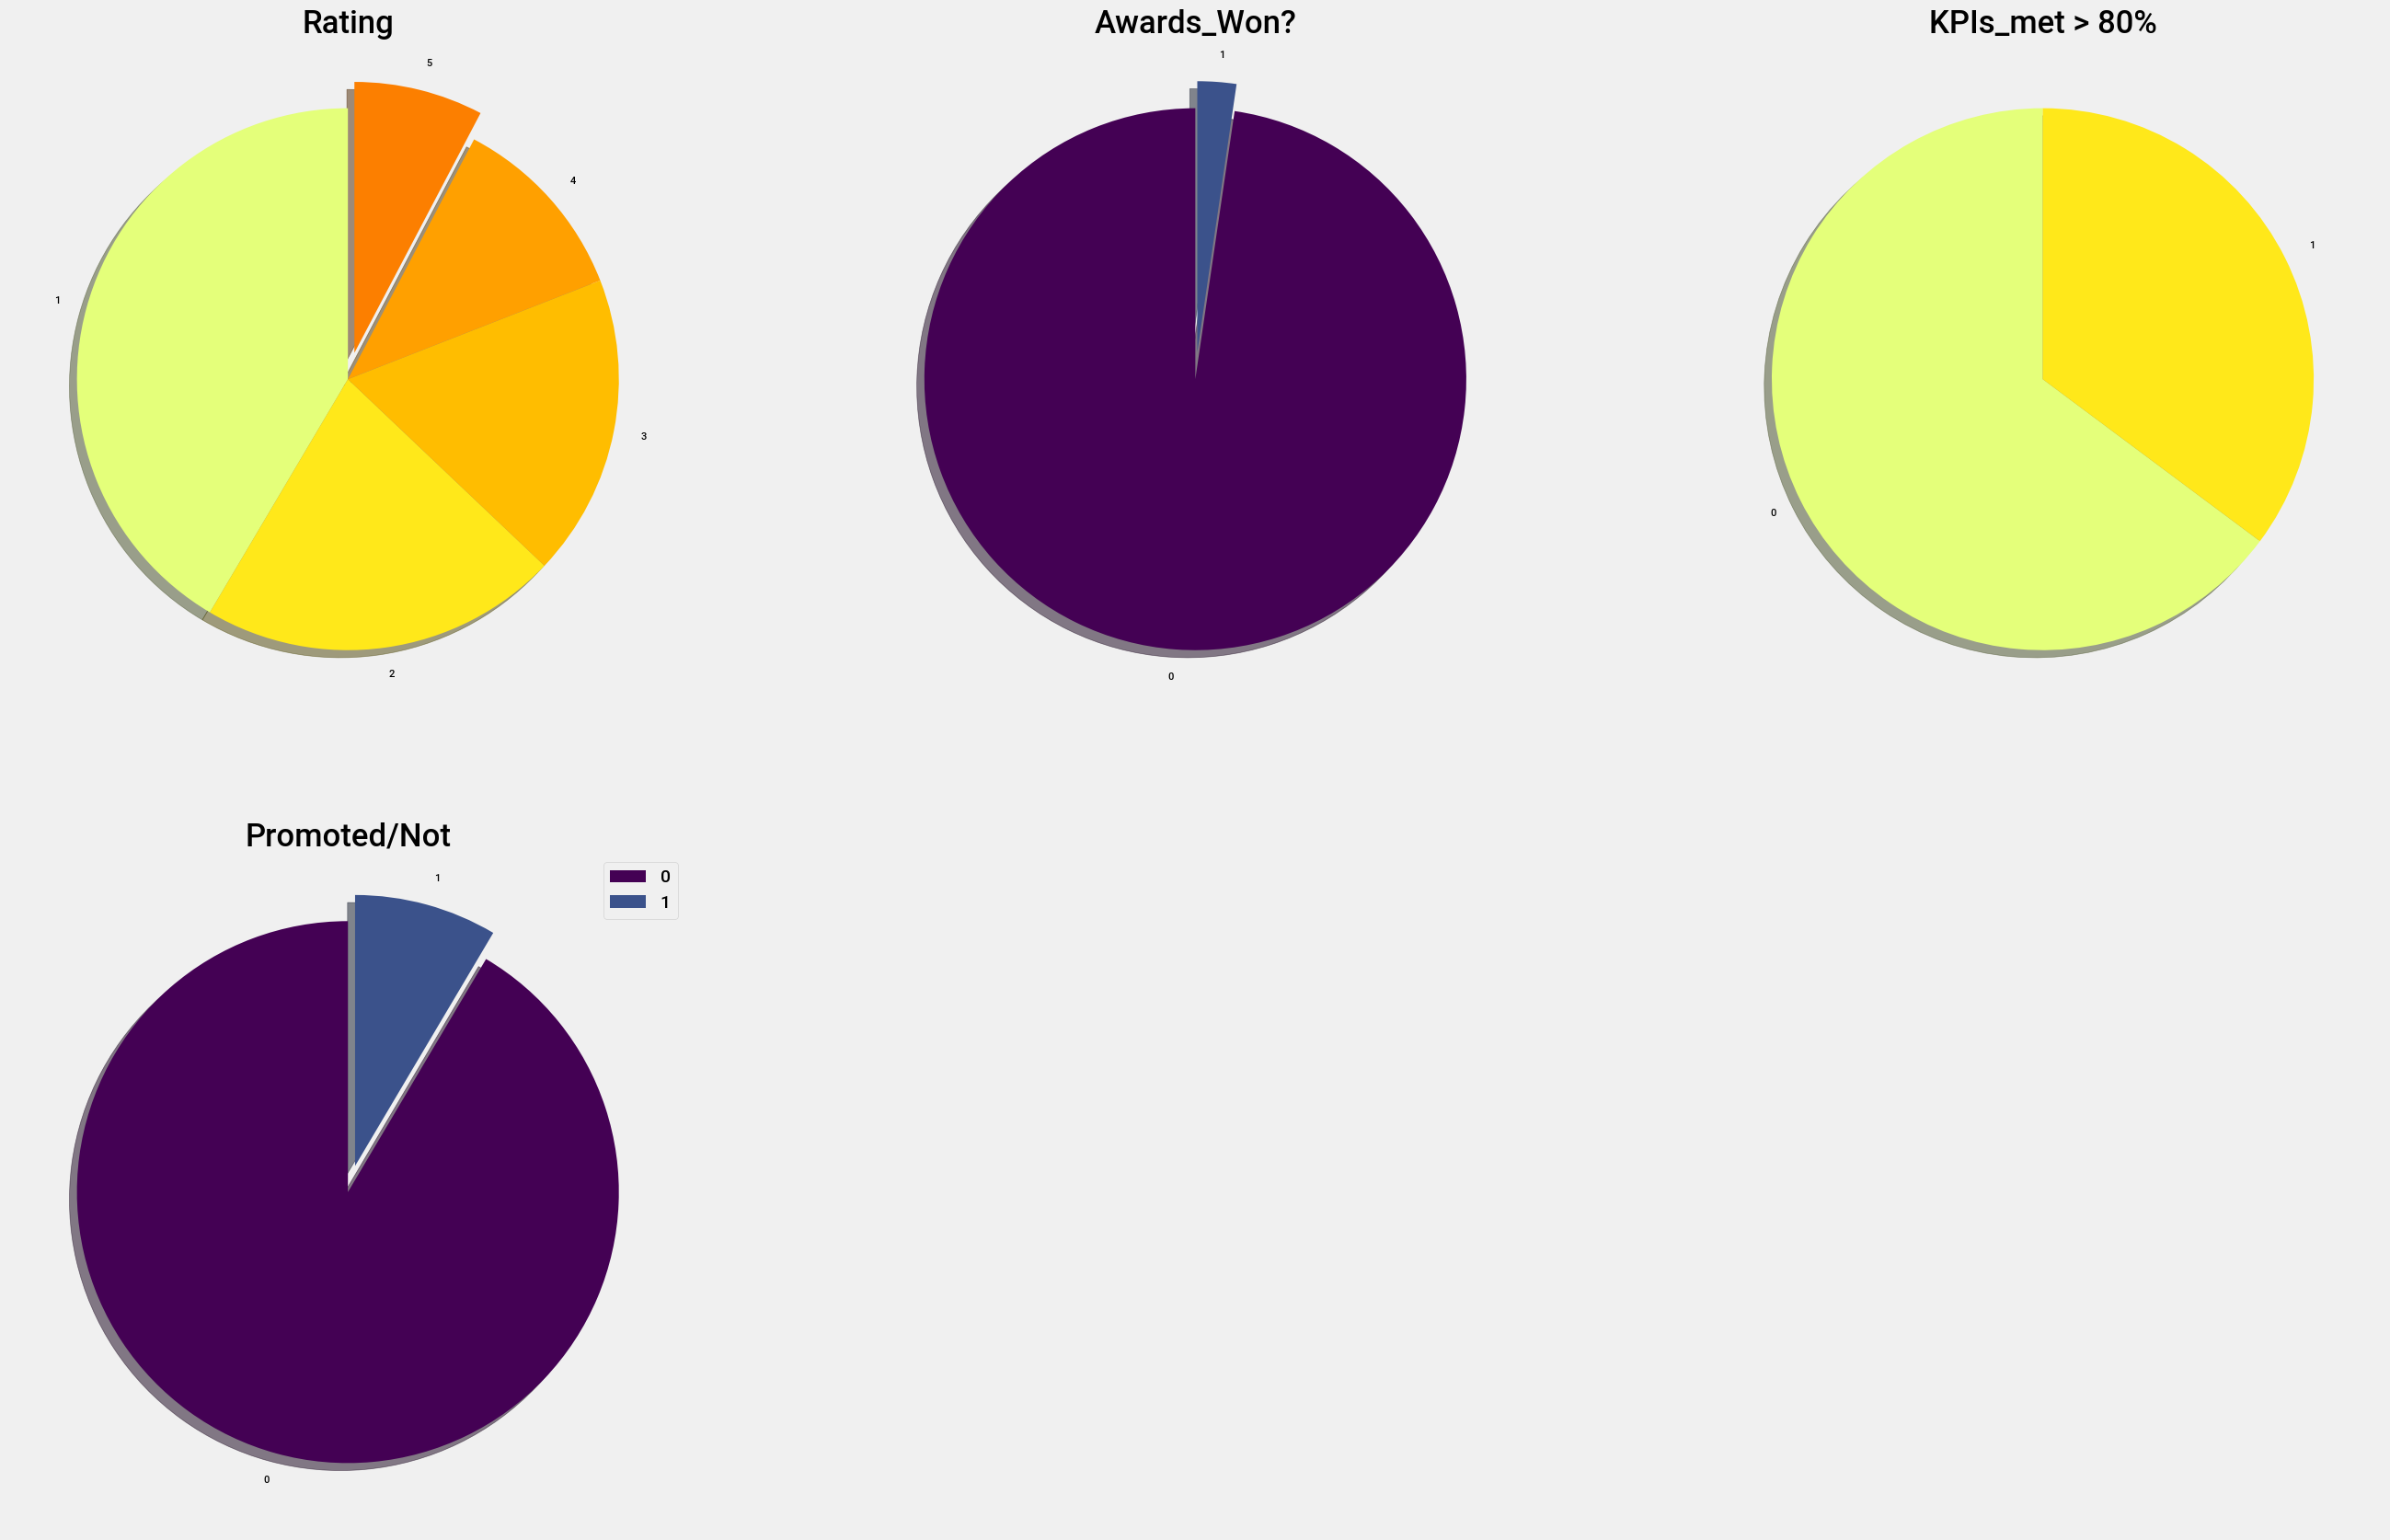

In [196]:
# Now lets us analyse the categorical coulumns present in our dodge(train) dataset.
plt.rcParams['figure.figsize'] = (30,20)
plt.style.use('fivethirtyeight')


# PIE CHART for the coulumn dodge['previous_year_rating'].
#          (no.columns,no.rows,position)
plt.subplot(2,3,1)
# labels refers to name of the each piece of the pie.
labels = ['1','2','3','4','5']
#        dodge['column_name'].count_of_values_in that_column.
sizes = dodge['previous_year_rating'].value_counts()
#        plt.ColorMap.colormap_name(np.linspace(0,start_color_in_magma,num_colors_we want))
# other color maps (viridis,plasma,inferno,cividis,magma)
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
# explode is use when we want to see the category either the lower category/higher category. 
explode = [0,0,0,0,0.1]
plt.pie(sizes, labels=labels, explode = explode, colors = colors, shadow = True, startangle = 90)
plt.title('Rating',fontsize = 25)



# PIE CHART for column dodge['awards_won?'].

plt.subplot(2,3,2)
plt.title("Awards_Won?",fontsize = 25)
sizes = dodge['awards_won?'].value_counts()
labels = ['0','1']
colors =  plt.cm.viridis(np.linspace(0,1,5))
explode = [0,0.1]
plt.pie(sizes, labels = labels, colors =colors , explode = explode,  shadow = True, startangle = 90)



# PIE CHART for column dodge[KPIs_met >80%'].

plt.subplot(2,3,3)
plt.title('KPIs_met > 80%',fontsize = 25)
sizes = dodge['KPIs_met >80%'].value_counts()
labels = ['0','1']
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)


# PIE CHART for column dodge['is_promoted'].

plt.subplot(2,3,4)
plt.title('Promoted/Not',fontsize = 25)
sizes = dodge['is_promoted'].value_counts()
labels = ['0','1']
colors = plt.cm.viridis(np.linspace(0,1,5))
explode = [0,0.1]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)

# legend is an area describing the elements of the graph.
plt.legend()
# plt.show() is used to display the charts/visualizations that we have made.
plt.show()

## Results:
* By seeing the above Charts we can come to a conclusion that,
* Most of The employees are getting very Low ratings.
* Very Few Employees have Won the Awards Recently(2%), like it is very low in a company of employees around 50000+.
* Well, KPI'S Met are very negligibly good when compared to other aspects.
* Lastly, Assuming Overall Employee Performance Chart, Not more than 10% of Employees are getting promoted As expected by their performance.

In [197]:
## Analysing Categorical/Numerical Columns Using COUNT PLOTS. 

In [198]:
dodge.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


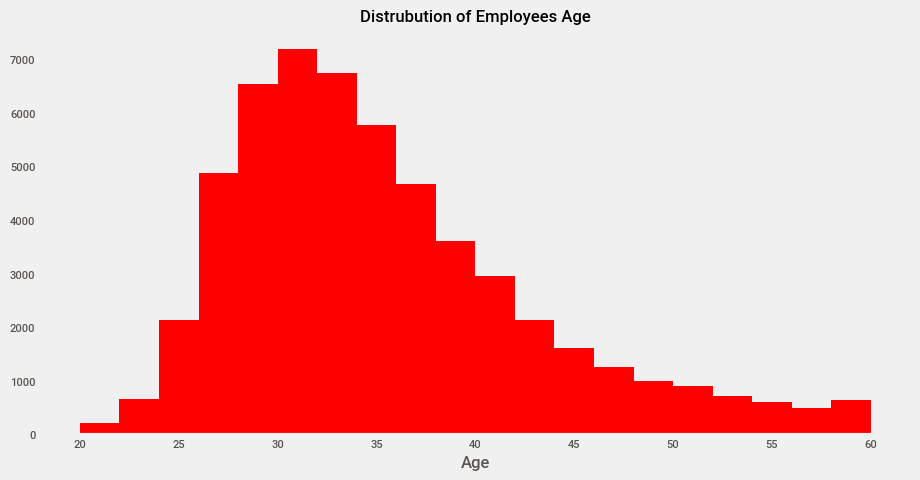

In [199]:
# lets analyse the categorical columns which consists of more categories.
# count plot for dodge['age'] categorical column.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
plt.hist(dodge['age'],color = 'Red', bins = 20)
plt.xlabel('Age',fontsize=12)

plt.title('Distrubution of Employees Age',fontsize = 12)

plt.grid()
plt.show()

Above is the Count Plot for distribution of age among the employees which shows the count of employees ages present in the dodge dataset.
We can see that employees with age group of 30's are more in number when compared to other age groups, this shows that there are some experienced workers or employees in the organisation.

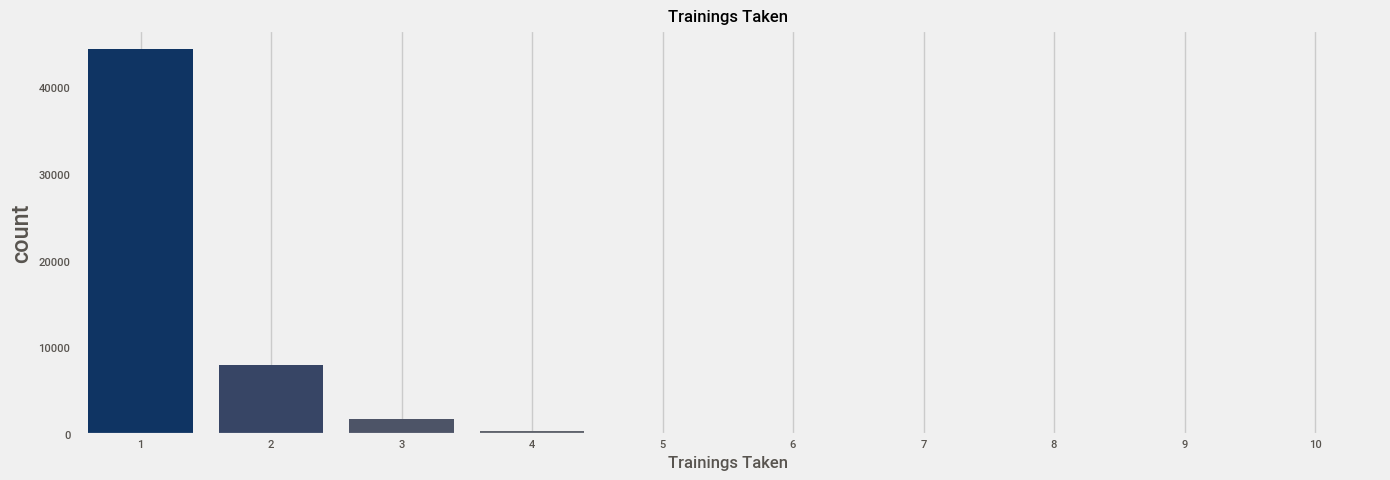

In [200]:
# lets analyse the categorical columns which are divide by more categories.
# count plot for dodge['no_of_training'] categorical column.
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
sns.countplot(dodge['no_of_trainings'], palette = 'cividis')
plt.title('Trainings Taken',fontsize = 12)
plt.xlabel('Trainings Taken',fontsize=12)

plt.grid()
plt.show()

Count Plot for no_of_trainings Undertaken by the employees in the organisation.
* we can see that more than 40000+(80%) employees have taken minimum of 1 training in their work experience.
* around negligible amount of employees have taken 2 trainings.
* 5% of employees have taken like 3 trainings.
* 3% of employees who have taken trainings more than thirce.

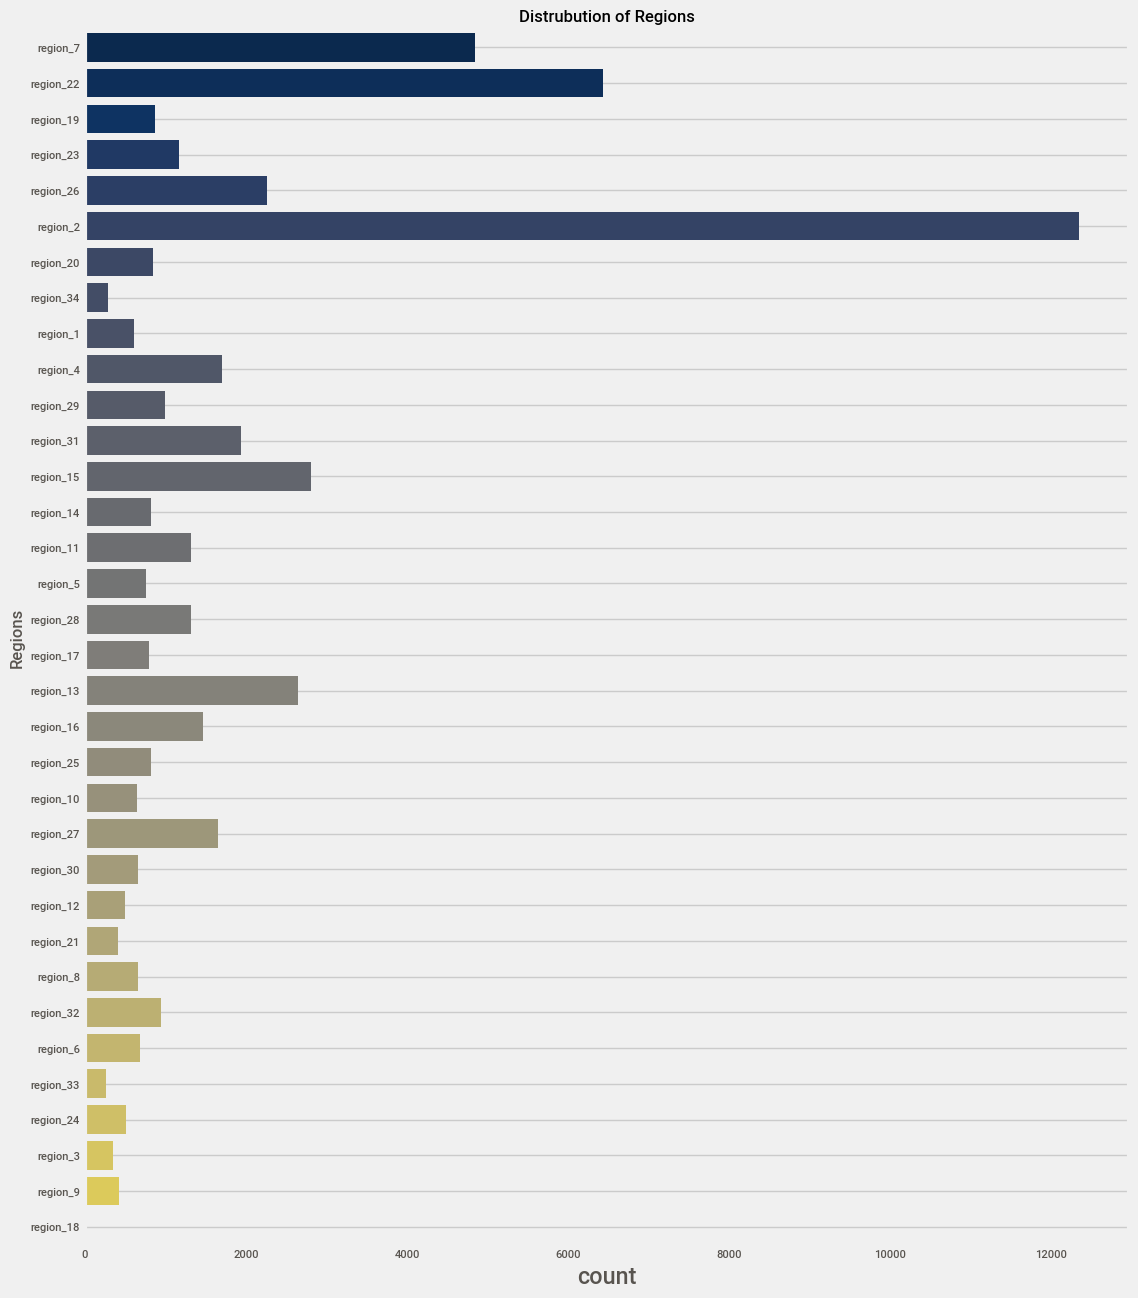

In [201]:
# lets analyse the categorical columns which are divide by more categories.
# count plot for dodge['region'] categorical column.
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
sns.countplot(y=dodge['region'], palette = 'cividis', orient = 'v')
plt.title('Distrubution of Regions',fontsize = 12)
plt.ylabel('Regions',fontsize=12)

plt.grid()
plt.show()

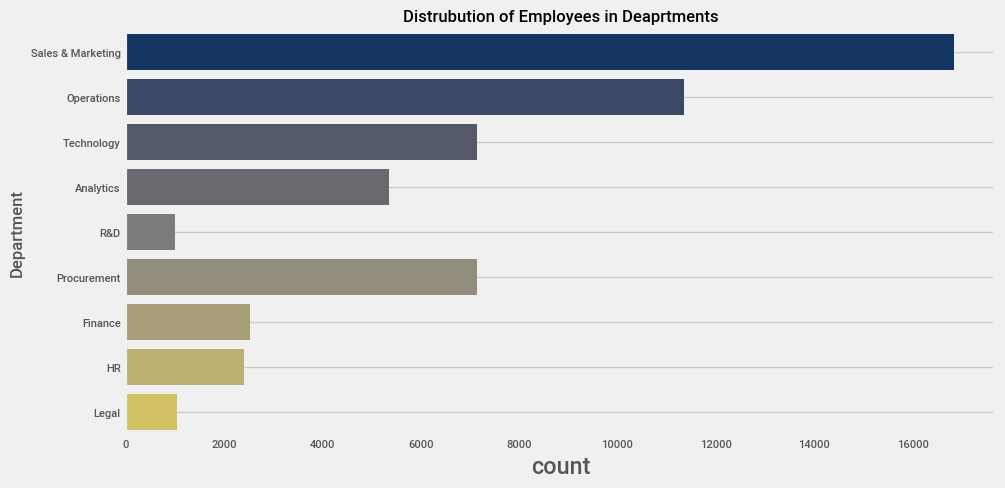

In [202]:
# lets analyse the categorical columns which are divide by more categories.
# count plot for dodge['age'] categorical column.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
sns.countplot(y=dodge['department'], palette = 'cividis', orient = 'v')
plt.title('Distrubution of Employees in Deaprtments',fontsize = 12)
plt.ylabel('Department',fontsize=12)
plt.grid()
plt.show()

Above Count plot shows the distribution of employees among different departments present in the organisation.
* we can see that Sales & Marketing department is ruling the organisation which has got more number of employees working on it, along with Operation, Technology, Analytics so on..

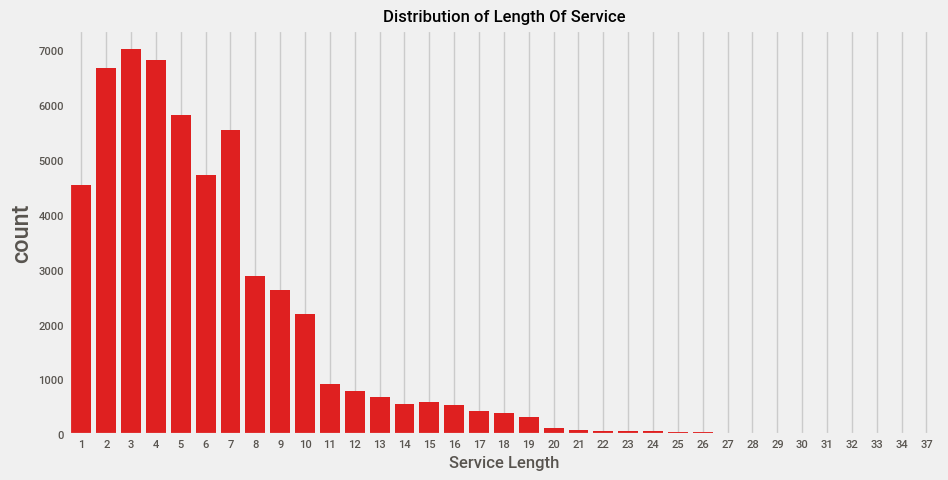

In [203]:
# lets analyse the categorical columns which are divide by more categories.
# count plot for dodge['length_of_service'] categorical column.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
sns.countplot(dodge['length_of_service'],color = 'Red')
plt.xlabel('Service Length',fontsize=12)

plt.title('Distribution of Length Of Service',fontsize = 12)

plt.grid()
plt.show()

The Above Count Plot shows the Distrubution of Length_of_service in the Organisation among Emoloyees.
* we can see that there are very less employees who have 15 years of experience of work in the organisation.

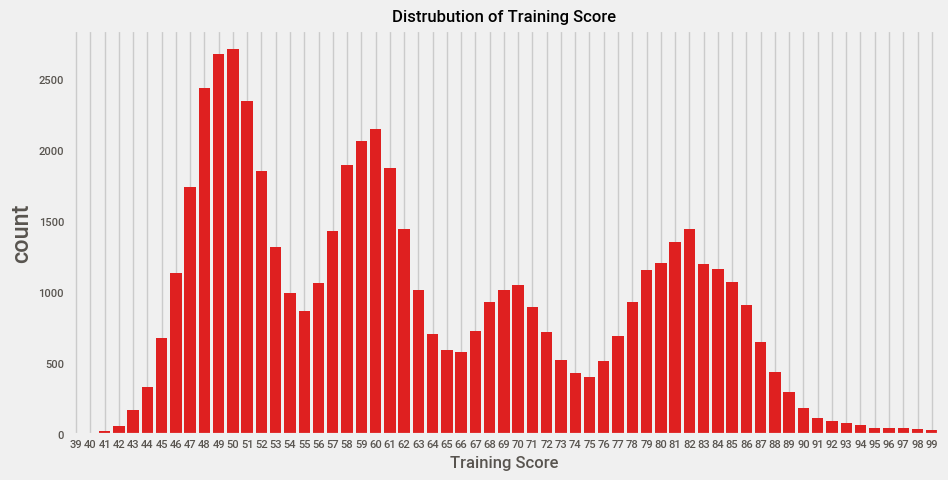

In [204]:
# lets analyse the categorical columns which are divide by more categories.
# count plot for dodge['avg_training_score'] categorical column.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,1,1)
sns.countplot(dodge['avg_training_score'],color = 'Red')
plt.xlabel('Training Score',fontsize=12)

plt.title('Distrubution of Training Score',fontsize = 12)

plt.grid()
plt.show()

In [205]:
### Now let us analyze some categorical Columns which are not Numerical Columns. 

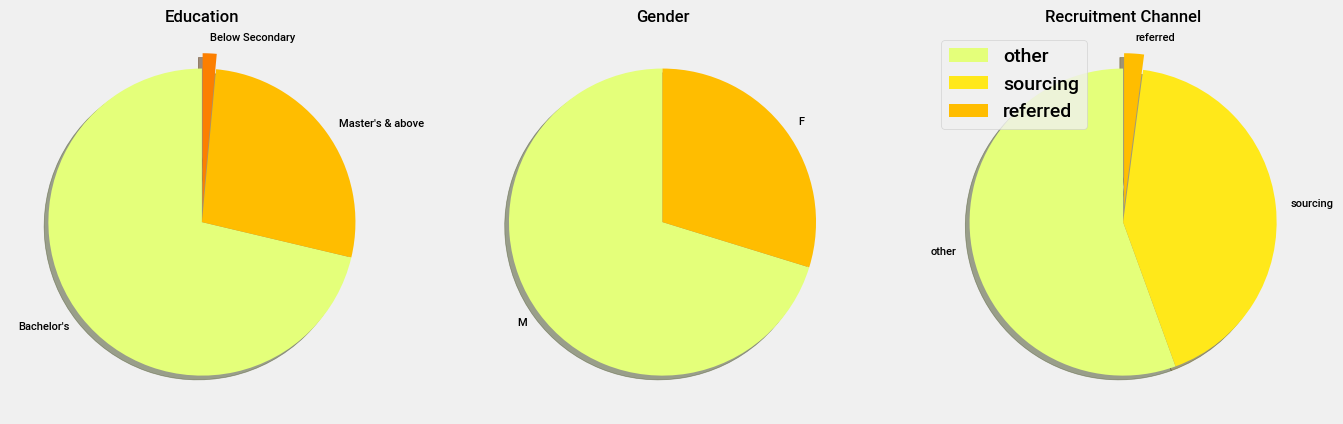

In [206]:
# let us analyse the columns dodge['education'],dodge['gender'] using PIE CHARTS.
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('fivethirtyeight')

# PIE CHART for dodge['education'] column.
plt.subplot(1,3,1)
labels = dodge['education'].value_counts().index
sizes = dodge['education'].value_counts()
explode = [0,0,0.1]
colors = plt.cm.Wistia(np.linspace(0,1,3))
plt.pie(sizes, colors=colors, labels=labels, explode=explode, shadow =True, startangle=90 )
plt.title('Education',fontsize=12)


#PIE CHART for dodge['gender'] column.
plt.subplot(1,3,2)
#labels = dodge['gender'].value_counts().index
labels = ['M','F']
sizes = dodge['gender'].value_counts()
explode = [0,0]
colors = plt.cm.Wistia(np.linspace(0,1,3))
plt.pie(sizes, colors=colors, labels=labels, explode=explode, shadow =True, startangle=90 )
plt.title('Gender',fontsize=12)


#PIE CHART for dodge['recruitment_channel'] column
plt.subplot(1,3,3)
labels = dodge['recruitment_channel'].value_counts().index
sizes = dodge['recruitment_channel'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0.1]
plt.pie(sizes, colors=colors, explode=explode, labels=labels, shadow=True, startangle=90)
plt.title('Recruitment Channel',fontsize=12)




plt.legend()
plt.show()

### Results:
* Above We have studied how employee promotion has got involved with the aspects such as KPI's,RATING,AWARDS_WON.
* Now, Lets us discuss some more aspects like how Education, Gender, Recruitment Channel Which Involves in Employees Retention.
* The first Chart Purely Shows that There are lot of Employees With Bachelors Background and very less Employees With Below Secondary Background, Which means People Are not showing interest in working after their Below Secondary Education i.e People are more involved into their higher studies than working.
* Gender - As Expected there are more numbers of Males in the Organisation than Females, Which will never leave them on backfoot of getting promotion.
* Recruitment channel - We can see that very few employees are being referred in a company to work because of the connections they make which is very good, but also most of the employees are being pulled due to sourcing(based on skill they possess) and some Other Private Recruitment channels. 

# BIVARIATE ANALYSIS 
* Bivariate Anlaysis is technique of analysing 2 or more columns at a time, Due to this we can make significant findings, to find how does this columns affect our employees promotion status and to find the relationship between both the  variables/columns.
* It also helps us in simple hypothesis association.

#### Types of Bivariate Analysis.

* Categorical vs Categorical
* Numerical vs Categorical
* Numerical vs Numerical
* First, we will perform Categorical vs Categorical Analysis using Grouped Bar Charts with the help of crosstab function.
* Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, etc
* Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

In [207]:
## Categorical vs Categorical 

Text(0.5, 0, ' ')

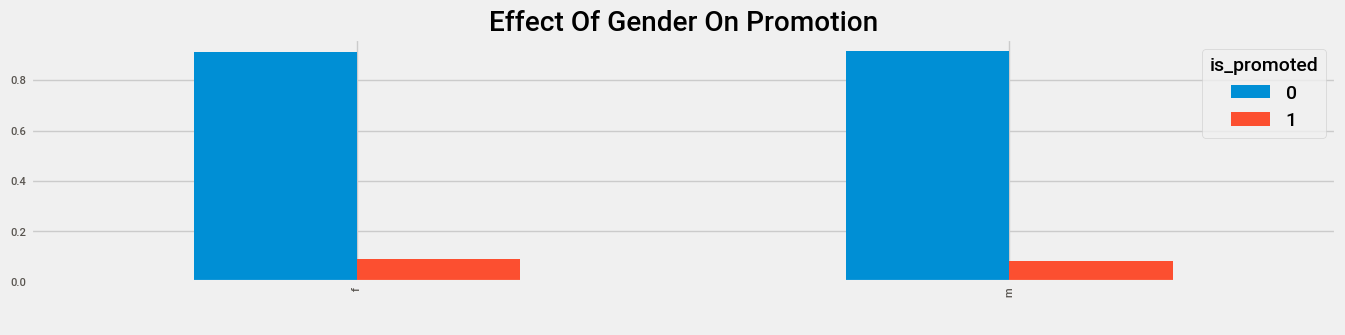

In [208]:
# Categorical vs Categorical Analysis using Grouped Bar Charts with the help of crosstab function.
# lets check the Effect of gender on Promotion.


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(15,3)

# pd.crosstab() function is a very useful and most advanced fuction in the python dataframe,
# which gives the result by comparing 2 or more columns/variables from the dataset.

x = pd.crosstab(dodge['gender'],dodge['is_promoted'])
# or x.plot(kind='bar', stacked = False) / x.plot(kind='bar') /x.plot()
x.div(x.sum(1).astype(float), axis = 0).plot(kind='bar', stacked = False)

plt.title('Effect Of Gender On Promotion')
plt.xlabel(" ")

* Although we have seen female were minority in the organisation, but with this plot completly rules out that distribution, where we can see conclude that females are giving neck to neck competition to males in getting promoted. 

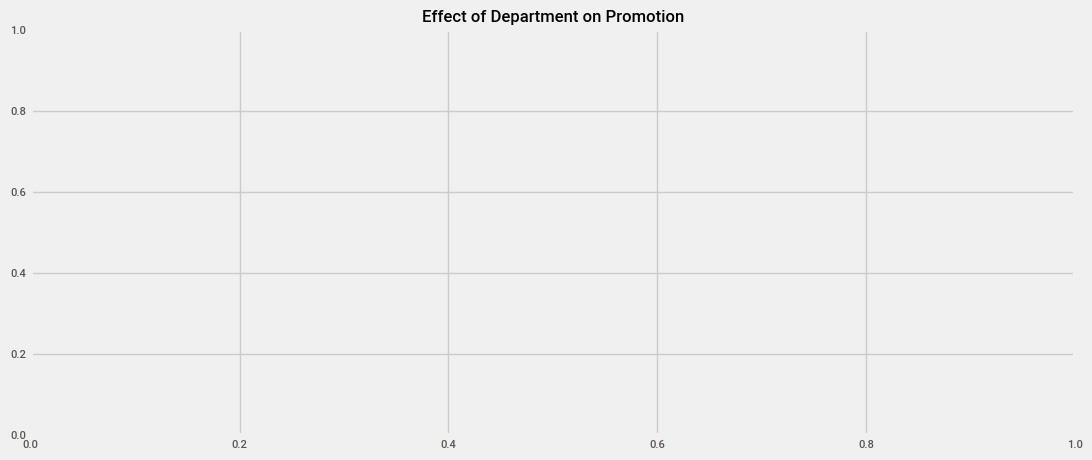

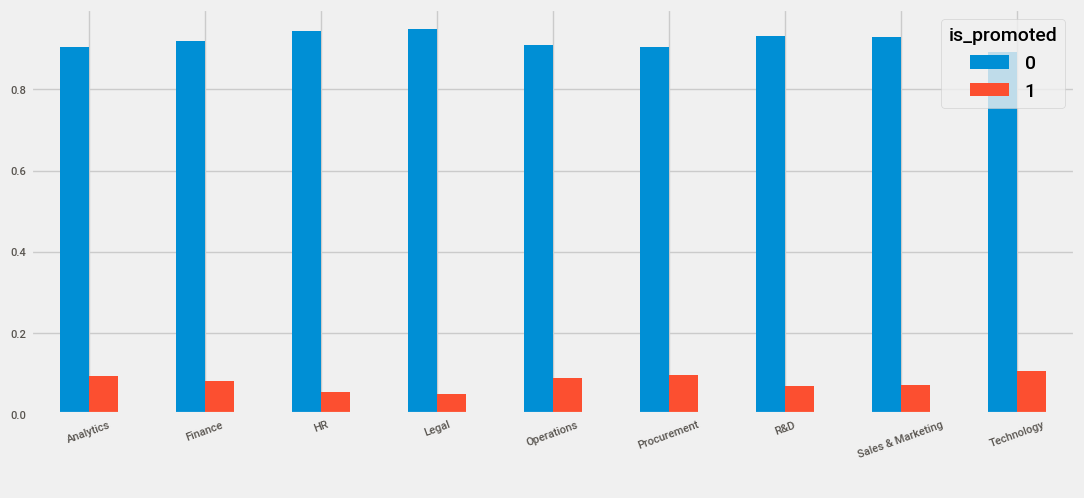

In [209]:
# Effect of Department on Promotion.

plt.rcParams['figure.figsize'] = (12,5)
plt.title('Effect of Department on Promotion',fontsize=12)
x = pd.crosstab(dodge['department'],dodge['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.xlabel(' ')
plt.xticks(rotation = 20)
plt.show()

* There isn't much difference of getting promoted based on the departments, where every department has different process and almost every department has equal number of people getting promoted.
* Although Technical and procurement employees are topped in the list.

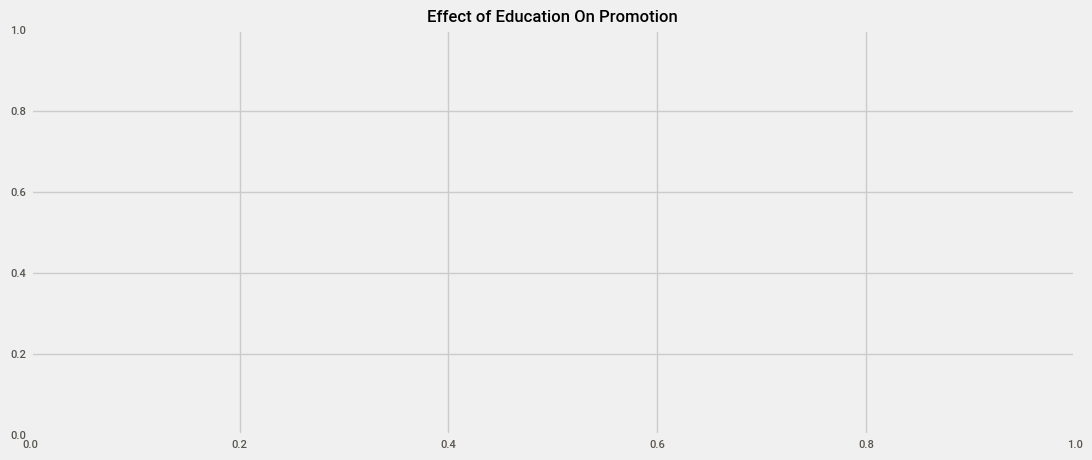

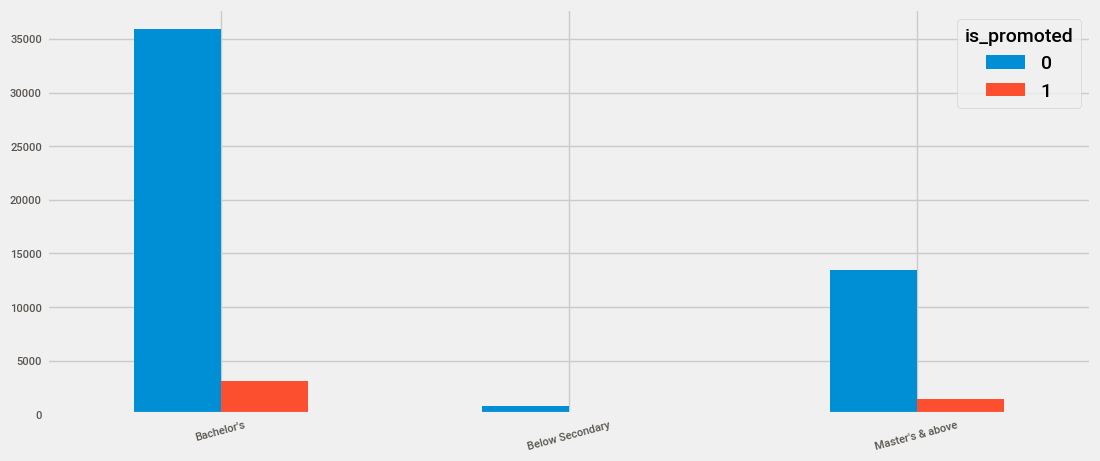

In [210]:
# Effect of Education on Promotion.

plt.rcParams['figure.figsize'] = (12,5)
plt.title("Effect of Education On Promotion", fontsize = 12)
x = pd.crosstab(dodge['education'], dodge['is_promoted'])
x.plot(kind = 'bar', stacked = False)
plt.xlabel('')
plt.xticks(rotation = 15)
plt.show()

* It is clearly shown that Employees Owing Bachelors degree are most likey to get promoted comapritively to other two educations.
* As Expected there aren't many Employees with Below Secondary Degree who are likely in the race for Promotion, Because Most of the employees/People are showing Interests towards further studies rather than working after their Below Secondary Education.
* Employees owning Masters degree are also negligibly high to get promoted, as there aren't many employees with that Master's who have somewhat more advanced knowledge that other two.

In [211]:
## Numerical vs Categorical 

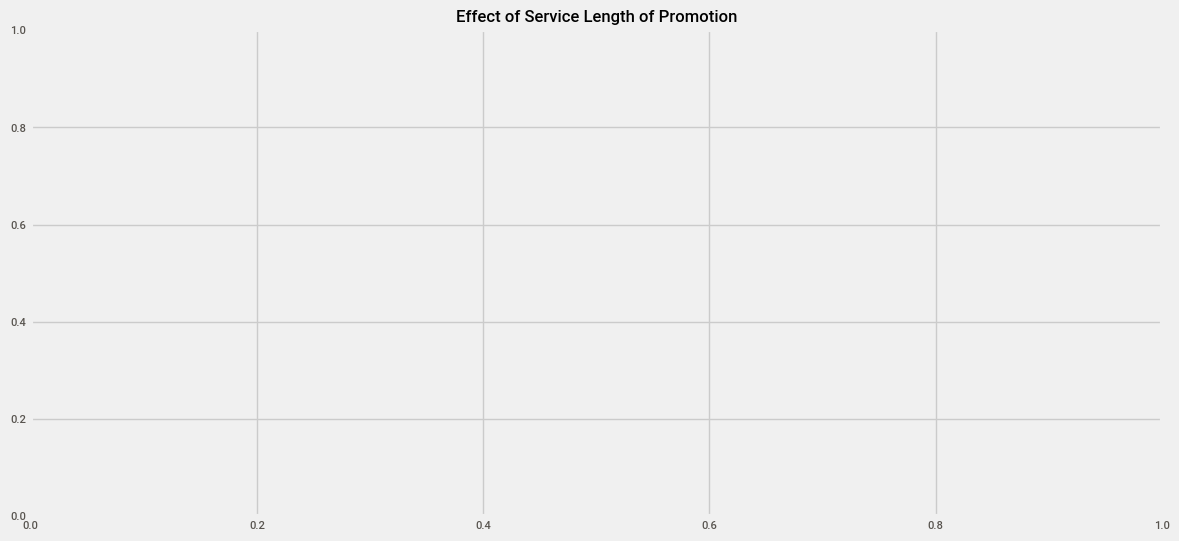

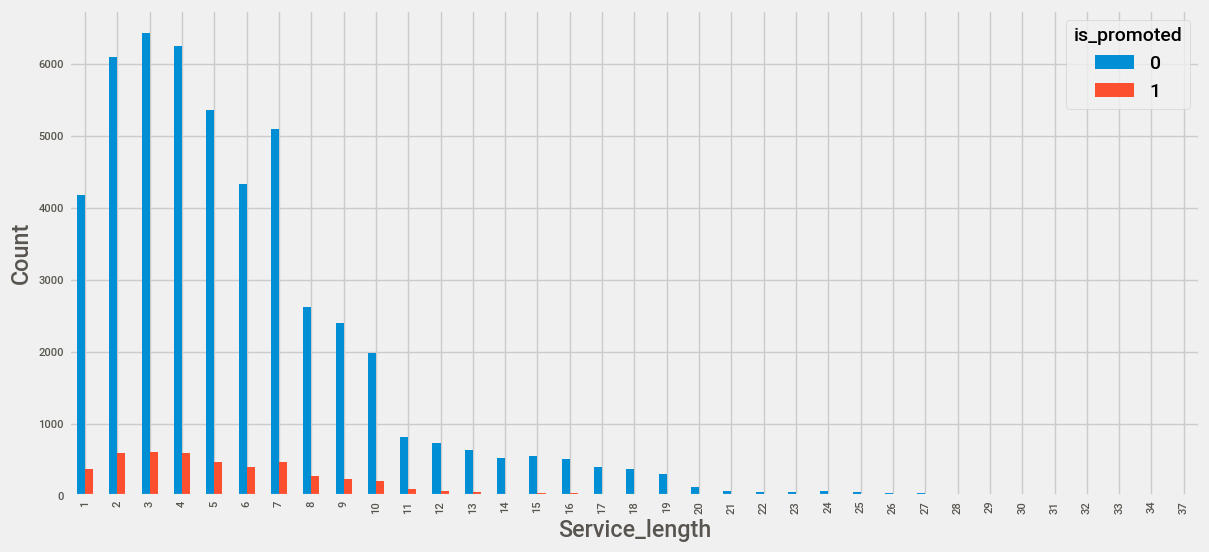

In [212]:
# Effect of length_of_servie on getting Promotion.

plt.rcParams['figure.figsize'] = (13,6)
plt.title('Effect of Service Length of Promotion', fontsize = 12)
x = pd.crosstab(dodge['length_of_service'],dodge['is_promoted'])
x.plot(kind = 'bar',stacked = False )
plt.xlabel('Service_length')
plt.ylabel('Count')
plt.show()



* It is clearly visible that the Company is not giving first Priority to the employees with ample amount of Work Experience they have in the organisation, but mostly they are going for employees with negligible experience to give Promotion.

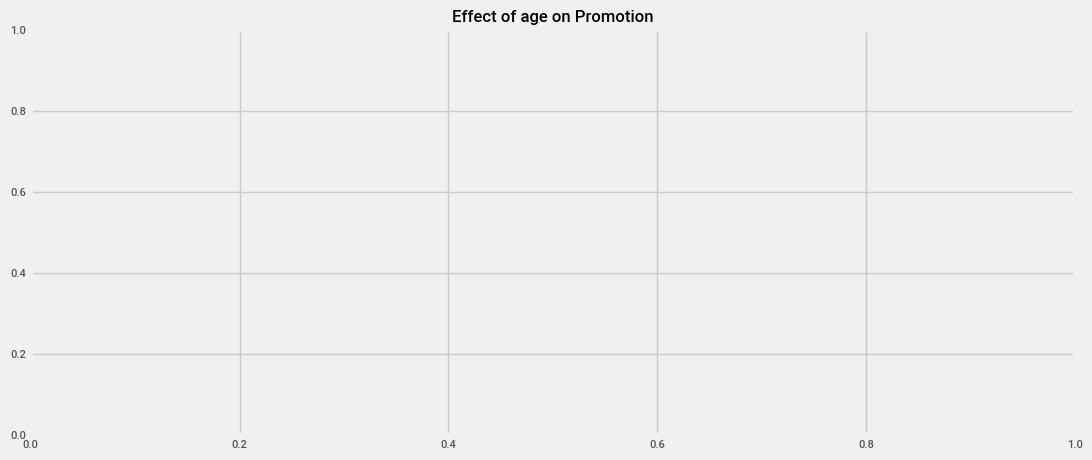

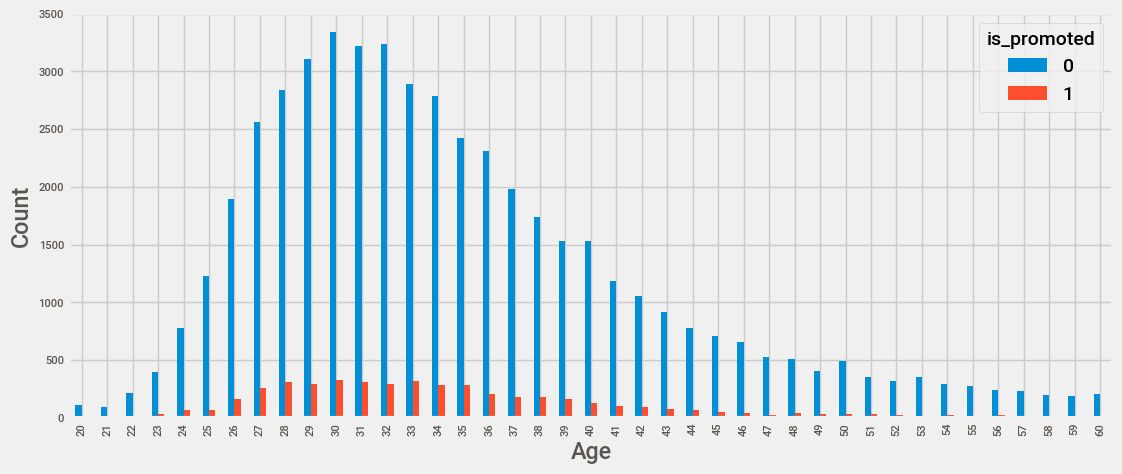

In [213]:
# Effect of age on Promotion using Bar plot.

plt.rcParams['figure.figsize'] = (12,5)
plt.title('Effect of age on Promotion', fontsize = 12)
x = pd.crosstab(dodge['age'],dodge['is_promoted'])
x.plot(kind='bar', stacked = False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


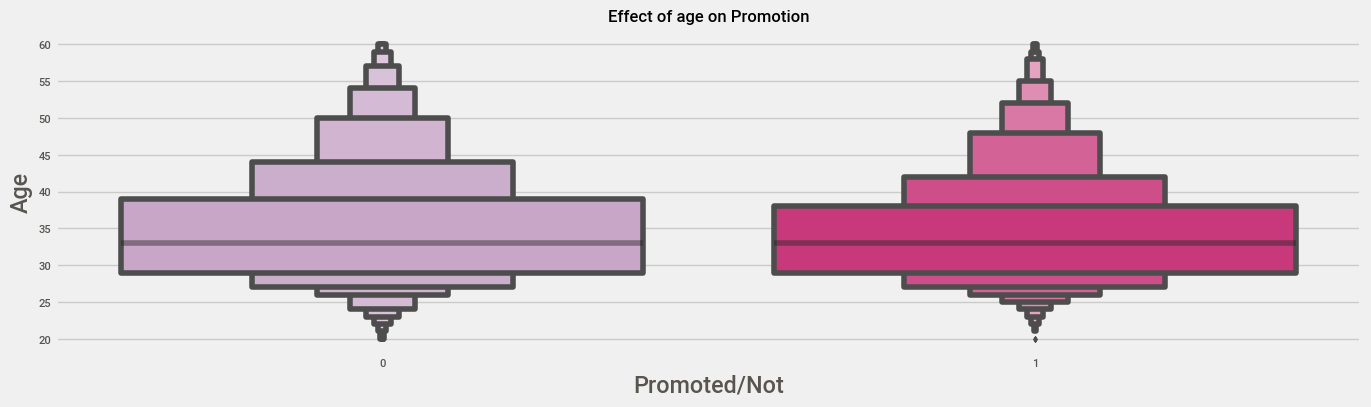

In [214]:
# Effect of age on Promotion using BoxenPlot.

plt.rcParams['figure.figsize'] = (15,4)
plt.title('Effect of age on Promotion', fontsize = 12)
sns.boxenplot(dodge['is_promoted'],dodge['age'], palette = 'PuRd')
plt.ylabel('Age')
plt.xlabel('Promoted/Not')
plt.show()


In [215]:
## Numerical vs Numerical 

In [216]:
dodge.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


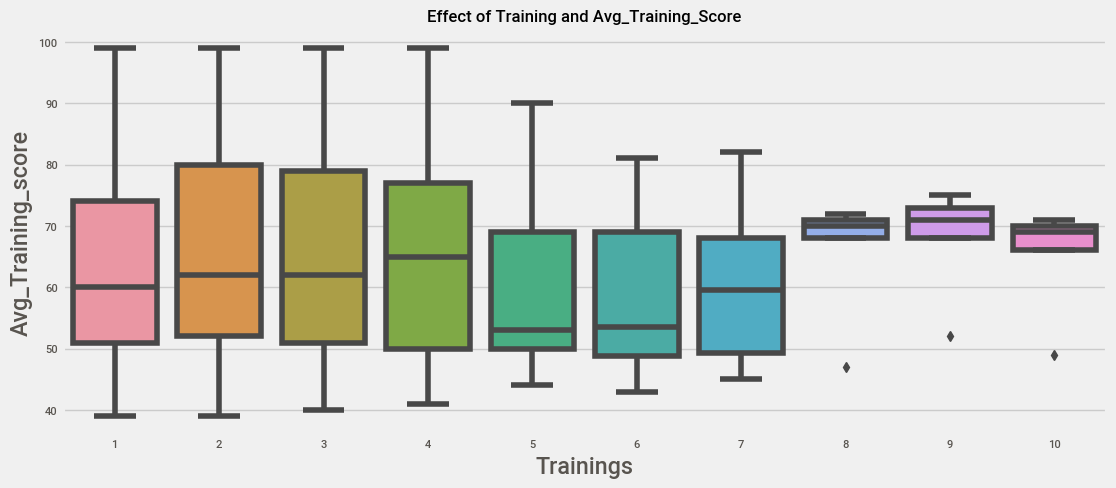

In [217]:
# lets plot for no_of_trainings and avg_training_score

plt.rcParams['figure.figsize'] = (12,5)
plt.title('Effect of Training and Avg_Training_Score', fontsize = 12)
sns.boxplot(dodge['no_of_trainings'],dodge['avg_training_score'])
#x = pd.crosstab(dodge['no_of_trainings'],dodge['avg_training_score'])
#x.plot(kind = 'bar', stacked = False)

plt.xlabel('Trainings')
plt.ylabel('Avg_Training_score')
plt.show()

* It is seen that the Avg Training Score is gradually decreasing for the Employees taking More number of Trainings.
* He/She might not be from a relavant domain of the work they are doing, due to that they might be taking more number of trainings to master the skill they need in the work.
* It is recommended that an Employee should not take more than 2-3 trainings, inorder to be in the race for the promotion or else he/she might get demoted or get fired from the workspace due to lack of knowledge on what they are working on.

* Although we have seen that taking more number of trainings might affect your promotion, But for some employees it can also increase their service length like in the above plot.

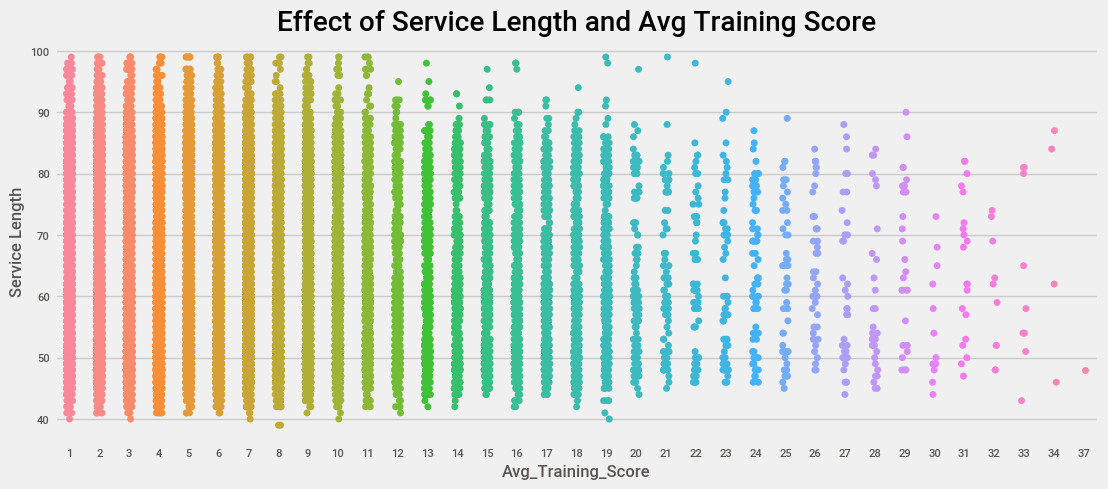

In [218]:
# lets check for length_of_service and avg_training_Score.

plt.rcParams['figure.figsize'] = (12,5)
plt.title('Effect of Service Length and Avg Training Score')
sns.stripplot(dodge['length_of_service'], dodge['avg_training_score'])
plt.ylabel('Service Length', fontsize = 12)
plt.xlabel('Avg_Training_Score', fontsize = 12)

plt.show()

* The above visualization explains us about how Avg Training Score plays an important role for an employees length of the service in an organisation.
* So, based on the visualization we can tell that negligible number of employees have increased the length of their service with the Avg Training Score ranging between 43 - 87.

In [219]:
## Interactive Function for Visualising the columns(Bivariate).


In [220]:
# Using Boxplots.
# checking for Object types and Numerical Types.

plt.rcParams['figure.figsize'] = (12,5)
@interact_manual
def interactive_function(column1=list(dodge.select_dtypes('object').columns), column2 = list(dodge.select_dtypes('number').columns[1:])):
    sns.boxplot(dodge[column1],dodge[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [221]:
# Using Boxenplots.
# checking for Object types and Numerical Types.

plt.rcParams['figure.figsize'] = (12,5)
@interact_manual
def interactive_function(column1=list(dodge.select_dtypes('object').columns), column2 = list(dodge.select_dtypes('number').columns[1:])):
    sns.boxenplot(dodge[column1],dodge[column2])

interactive(children=(Dropdown(description='column1', options=('department', 'region', 'education', 'gender', …

In [222]:
## Interactive function for Numerical and Numerical types using Box,Boxen,strip

In [223]:
# Using Boxplots.
# checking for Numerical types and Numerical Types.

plt.rcParams['figure.figsize'] = (12,5)
@interact_manual
def interactive_function(column1=list(dodge.select_dtypes('number').columns[1:]), column2 = list(dodge.select_dtypes('number').columns[1:])):
    sns.boxplot(dodge[column1],dodge[column2])

interactive(children=(Dropdown(description='column1', options=('no_of_trainings', 'age', 'previous_year_rating…

In [224]:
# Using Boxenplots.
# checking for Numerical types and Numerical Types.

plt.rcParams['figure.figsize'] = (12,5)
@interact_manual
def interactive_function(column1=list(dodge.select_dtypes('number').columns[1:]), column2 = list(dodge.select_dtypes('number').columns[1:])):
    sns.boxenplot(dodge[column1],dodge[column2])

interactive(children=(Dropdown(description='column1', options=('no_of_trainings', 'age', 'previous_year_rating…

In [225]:
# Using stripplots.
# checking for Numerical types and Numerical Types.

plt.rcParams['figure.figsize'] = (12,5)
@interact_manual
def interactive_function(column1=list(dodge.select_dtypes('number').columns[1:]), column2 = list(dodge.select_dtypes('number').columns[1:])):
    sns.stripplot(dodge[column1],dodge[column2])

interactive(children=(Dropdown(description='column1', options=('no_of_trainings', 'age', 'previous_year_rating…

# MultiVariate Anlaysis

* In this instance, a multivariate analysis would be required to understand the relationship of each variable with each other.


* First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
* Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.


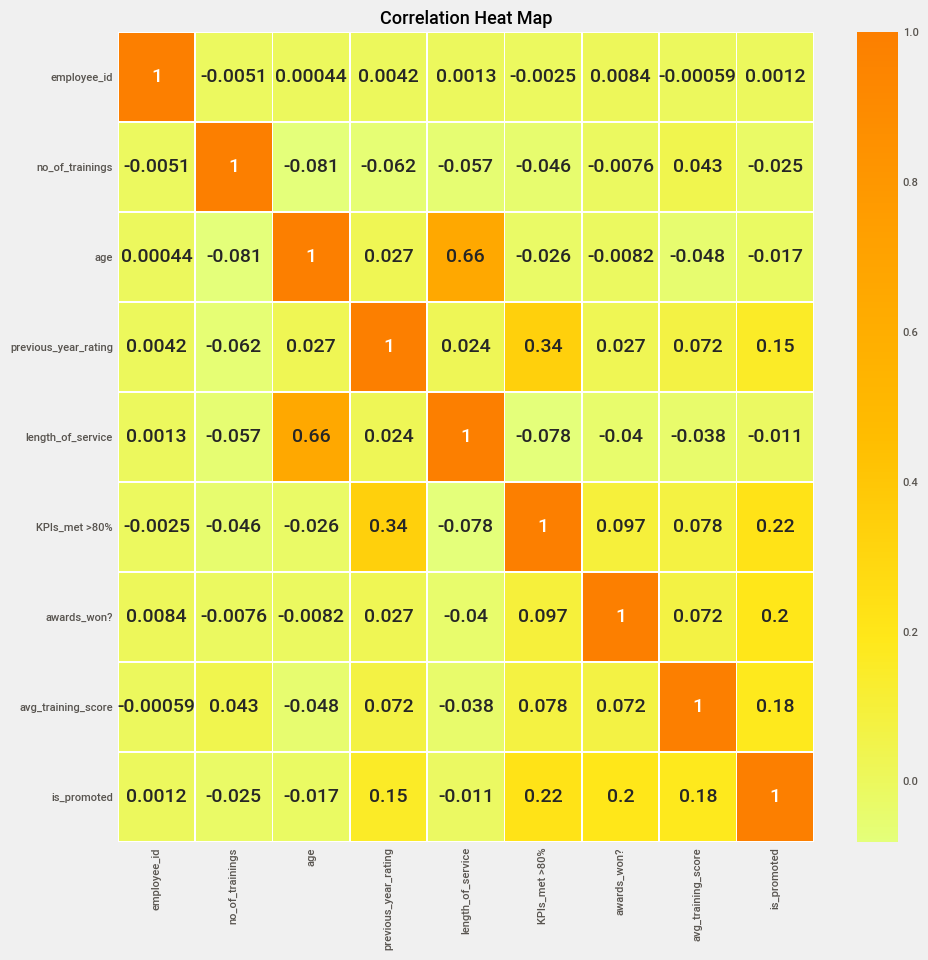

In [226]:
# lets plot the correlation heat map for all the numerical columns.
# correlation heat map is used to identify the columns which share same data/contains identical data.
# so that we can just remove any one of them from our dataset to make our model work faster and efficient.

# If the value is 1 that means values are highly correlated.
# If the value is 0 that means their is no similarity / disimilarity.
# If the value is -1 that means their is no correlation between the columns.
# dodge.corr() is the correlation of dodge dataset.

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Correlation Heat Map', fontsize = 13)
sns.heatmap(dodge.corr(),annot=True, linewidth = 0.5, cmap = 'Wistia')

plt.show()

* Through the above heat map we can see that their is a correlation between age and length of service of the employees, obviously if an employee with age 50 years would have work experience of around 20 years, but an employee with 25 years would not have that much experience so, he might not be a part of the organisation.
* Not only Age and Length of Service, We also have correlation between Kpi's Met and Previous Year ratings. 

In [227]:
dodge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


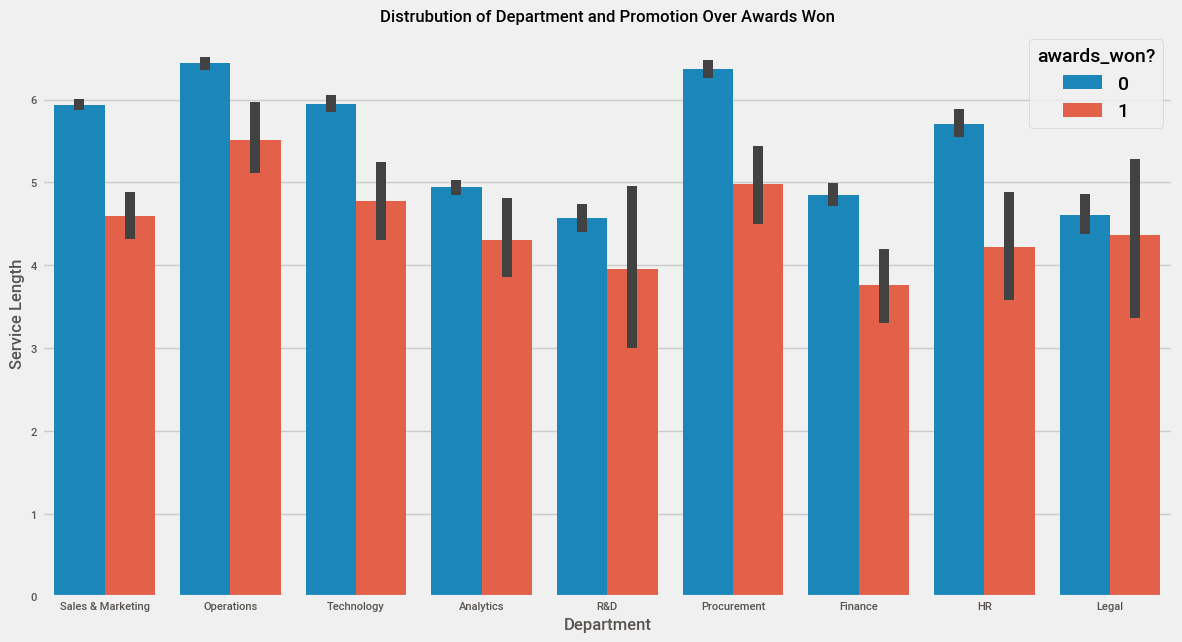

In [228]:
# Lets check for Dsitrbution and Length of Service W>R>T Awards Won.

plt.rcParams['figure.figsize'] = (13,7)
plt.title('Distrubution of Department and Promotion Over Awards Won', fontsize = 12)
sns.barplot(dodge['department'],dodge['length_of_service'],dodge['awards_won?'])
plt.xlabel('Department', fontsize = 12)
plt.ylabel('Service Length', fontsize = 12)
plt.show()

# Feature Engineering

* Feature Engineering is the Technique of using Domain Knowledge inorder to extract the important features from the dataset using some data mining techniques.
* These features can in turn help us to create/build an efficient Machine Learning Model.


* Now, There are lot of methods/techniques to perform feature engineering such as.
* People in the industry consider it has a most important step, due to the important information it will provide by the features extracted.
* Before Starting a Project one need to thoroughly understand each and every column present in the dataset, inorder to extract some new features from the old existing features.
* Different ways of extracting features from the dataset.
 * We can remove unnecessary columns from our dataset.
 * we can perform Binning method on Numerical and Categorical columns.
 * we can extract features from date and time features.
 * we can extract features from the categorical columns.
 * we can even perform aggreagtion on two/more columns together using some aggregating functions.

In [229]:
dodge.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [230]:
# 1.Performing Aggregation on the columns.

dodge['sum_metric'] = dodge['awards_won?'] + dodge['KPIs_met >80%'] + dodge['previous_year_rating']
charger['sum_metric'] = charger['awards_won?'] + charger['KPIs_met >80%'] + charger['previous_year_rating']

dodge['total_score'] = dodge['avg_training_score'] * dodge['no_of_trainings']
charger['total_score'] = charger['avg_training_score'] * charger['no_of_trainings']


In [231]:
dodge.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [232]:
# 2.Removing Unnecessary Columns from the dataset.

dodge = dodge.drop(['employee_id', 'region', 'recruitment_channel'], axis=1)
charger = charger.drop(['employee_id', 'region', 'recruitment_channel'], axis=1)

In [233]:
dodge.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0,3.0,73


# Grouping and Filtering
* Grouping is the fundamental concept and very important function in clustering techniques.
* They are used to find the collections of entities and the relationships they have between each other.
* Grouping and filtering is considered as one of the important steps in analysing/investigating the data.
* It helps in taking important decisions using filters and groupby funtions.

In [234]:
# using crosstab() fucntion we find the distribution of kpis met and awards won.

x = pd.crosstab(dodge['KPIs_met >80%'], dodge['awards_won?'])
x.style.background_gradient(cmap='viridis')

awards_won?,0,1
KPIs_met >80%,,
0,35076,441
1,18462,829


In [235]:
# crosstab() for department and promotion.

x = pd.crosstab(dodge['department'], dodge['is_promoted'])
x.style.background_gradient(cmap='viridis')

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [236]:
#crosstab() for how gender affecting the promotion of employees.

x = pd.crosstab(dodge['gender'], dodge['is_promoted'])
x.style.background_gradient(cmap='magma')

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [237]:
# crosstab() how no_of_trainings affect promotion.

x = pd.crosstab(dodge['no_of_trainings'], dodge['is_promoted'])
x.style.background_gradient(cmap='viridis')

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [238]:
#crosstab for how age affecting the employees promotion, majorly we can see that ages ranging[26-40] are more likey to get promoted, maybe due to their work experience.
x = pd.crosstab(dodge['age'], dodge['is_promoted'])
x.style.background_gradient(cmap='viridis')

is_promoted,0,1
age,,
20,109,4
21,93,5
22,213,18
23,394,34
24,775,70
25,1230,69
26,1897,163
27,2566,261
28,2839,308


In [239]:
x = pd.crosstab(dodge['education'],dodge['is_promoted'])
x.style.background_gradient(cmap= 'Wistia')

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


## Results.
 * we have seen that using crosstab functions, we have get to known how different columns affect the promotion of the employees, making us understand the dataset even more clearly, to make our prediction model efficient.

In [240]:
# checking awards_won by the employees by grouping through Departments.
# selecting multiple columns is done by below method.
# it can also be done by..
# dodge.groupby('department').count().sort_values(by='awards_won?', ascending = False), by it selects all the colums in the dataset, that's why we go for below method.

dodge[['department','awards_won?']].groupby('department').count().sort_values(by = 'awards_won?' ,ascending=False)

,awards_won?
department,
Sales & Marketing,16840
Operations,11348
Procurement,7138
Technology,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [241]:
dodge[['length_of_service','awards_won?']].groupby('length_of_service').count().sort_values(by = 'awards_won?', ascending = False)

,awards_won?
length_of_service,
3,7033
4,6836
2,6684
5,5832
7,5551
6,4734
1,4547
8,2883
9,2629


In [242]:
dodge[['no_of_trainings','length_of_service']].groupby('no_of_trainings').mean()

,length_of_service
no_of_trainings,
1,5.986592
2,5.430700
3,5.145270
4,4.912393
5,4.773438
6,5.750000
7,5.333333
8,2.600000
9,2.200000


In [243]:
# lets make an interactive console for grouping different columns.

@interact_manual
def group_operation(column1 = list(dodge.select_dtypes('object').columns), column2 = list(dodge.select_dtypes('number').columns)[1:]):
    return (dodge[[column1,column2]].groupby([column1]).count().style.background_gradient(cmap = 'viridis'))


interactive(children=(Dropdown(description='column1', options=('department', 'education', 'gender'), value='de…

In [244]:
# interactive manual for grouping 2 numerical columns and finding the count()

@interact_manual
def group_operation(column1 = list(dodge.select_dtypes('number').columns), column2 = list(dodge.select_dtypes('number').columns)[1:]):
    return (dodge[[column1,column2]].groupby([column1]).count().style.background_gradient(cmap = 'magma'))

interactive(children=(Dropdown(description='column1', options=('no_of_trainings', 'age', 'previous_year_rating…

In [245]:
# interactive console for grouping 2 columns and finding count,mean,max,min functions.

@interact_manual
def group_operation(column1 = list(dodge.select_dtypes('object').columns), column2 = list(dodge.select_dtypes('number').columns)[1:]):
    return (dodge[[column1,column2]].groupby([column1]).agg(['count','mean','max','min']).style.background_gradient(cmap = 'plasma'))

interactive(children=(Dropdown(description='column1', options=('department', 'education', 'gender'), value='de…

In [246]:
# interactive console for grouping 2 numerical columns and finding count,mean,max,min functions.

@interact_manual
def group_operation(column1 = list(dodge.select_dtypes('number').columns), column2 = list(dodge.select_dtypes('number').columns)[1:]):
    return (dodge[[column1,column2]].groupby([column1]).agg(['count','mean','max','min']).style.background_gradient(cmap = 'cividis'))

interactive(children=(Dropdown(description='column1', options=('no_of_trainings', 'age', 'previous_year_rating…

In [247]:
#Interactive Manual to check promotion status based on employees no of trainings taken. 

@interact
def check(column = 'no_of_trainings', x = 5):
    y = dodge[dodge['no_of_trainings'] > x]
    return y['is_promoted'].value_counts()
check()

interactive(children=(Text(value='no_of_trainings', description='column'), IntSlider(value=5, description='x',…

0    69
1     2
Name: is_promoted, dtype: int64

In [248]:
### Replacing no_of_trainings, Dealing with biased records and making Interactive Fucntions.

In [249]:
# since their is negligible values of employees taking trainings more than 5, we can just remove those training values and replace it by 5.

dodge['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [250]:
# replacing employees taken more than 5 trainings with only 5 trainings taken.

dodge['no_of_trainings'] = dodge['no_of_trainings'].replace((6,7,8,9,10),(5,5,5,5,5))
dodge['no_of_trainings'].value_counts()

1    44378
2     7987
3     1776
4      468
5      199
Name: no_of_trainings, dtype: int64

In [251]:
# lets check for any negative promotions/unfair promotions/ are their any employees who got promotion which they should not..
# like no awards won, no kpis met, low average training score, rating = 1.0

dodge[(dodge['awards_won?'] == 0) & (dodge['KPIs_met >80%'] == 0) & (dodge['avg_training_score'] < 60) & (dodge['previous_year_rating'] == 1.0) & (dodge['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [252]:
# let us remove those 2 records from the dataset using drop function.

print('Before Deleting the Rows:', dodge.shape)
dodge = dodge.drop(dodge[(dodge['awards_won?'] == 0) & (dodge['KPIs_met >80%'] == 0) & (dodge['avg_training_score'] < 60) & (dodge['previous_year_rating'] == 1.0) & (dodge['is_promoted'] == 1)].index)
print('After Deleting the Rows:',dodge.shape)

Before Deleting the Rows: (54808, 13)
After Deleting the Rows: (54806, 13)


In [253]:
# Interactive manual to check the promotion status of an employee with length_of_service > 10.

@interact
def check_promotion(x=10):
    y = dodge[dodge['length_of_service'] > x]
    return y['is_promoted'].value_counts()
check_promotion()

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

0    5439
1     447
Name: is_promoted, dtype: int64

In [254]:
# Interactive manual to check the promotion status of an employee with avg_training_score > 50.

@interact
def check_promotion(x=50):
    y = dodge[dodge['avg_training_score'] > x]
    return y['is_promoted'].value_counts()
check_promotion()

interactive(children=(IntSlider(value=50, description='x', max=150, min=-50), Output()), _dom_classes=('widget…

0    38611
1     4192
Name: is_promoted, dtype: int64

# Dealing With Categorical Columns.

* Dealing with categorical columns is a big step in a project, as sometimes they might hold the important values which help our model to predict accurately.
* Changing our categorical columns into numerical type is a very important step as most of the machine learning models works using numerical values compared to categorical/object type.
* There are several ways of converting a categorical object type into numerical type such as.
    * Here, we are going to use Business Logic to encode the education column / traditional replace() method.
    * Then we will use the Label Encoder, to Department and Gender Columns, which is part of machine learning module(sklearn).

In [255]:
dodge.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [256]:
dodge.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0,3.0,73


In [257]:
# lets convert the education column to numerical values by replacing(Masters & Above -> 3, Bachelor's -> 2, Below Secondary -> 1)

dodge['education'] = dodge['education'].replace(("Master's & above", "Bachelor's", 'Below Secondary'),(3,2,1)) 
charger['education'] = charger['education'].replace(("Master's & above", "Bachelor's", 'Below Secondary'),(3,2,1))

### LabelEncoder for encoding string into numbers using sklearn.preprocessing.
* Lets convert department and gender into numerical using label encoding technique using module sklearn.preprocessor import LabelEncoder.

* LabelEncoder -> Encode target labels with value between 0 and n_classes-1.
* it will first identify the strings in the columns and sorts them in ascending order then assigns the string with a number from (0 to nclasses-1).

In [258]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dodge['department'] = le.fit_transform(dodge['department'])
charger['department'] = le.fit_transform(charger['department'])

dodge['gender'] = le.fit_transform(dodge['gender'])
charger['gender'] = le.fit_transform(charger['gender'])

In [259]:
dodge.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


# Splitting of Data.
* Splitting of data is often considered as one of the important stpes of building a machine model, where we need to seperate/ split our target_column into separate column form the original datset.
* In our case we just drop our target_column [is_promoted] from the dataset and store it in a seperate dataframe, and rest of the columns in another dataframe.
* Also, we change our test dataset name from charger to test_data.

In [260]:
lexus = dodge['is_promoted']
mustang = dodge.drop(['is_promoted'],axis=1)
test_data = charger

In [261]:
print("shape of Lexus is: ", lexus.shape)
print("shape of mustang(dodge) is: ", mustang.shape)
print("shape of test_data(charger) is: ", test_data.shape)

shape of Lexus is:  (54806,)
shape of mustang(dodge) is:  (54806, 12)
shape of test_data(charger) is:  (23490, 12)


In [262]:
lexus.value_counts()

0    50140
1     4666
Name: is_promoted, dtype: int64

In [263]:
lexus.shape

(54806,)

# Resampling
* Resampling is the method that is used to Balance our dataset.


* This Resampling comes to handy whenever our variables/columns are highly imbalanced, so we need to balance them by using some of these resmapling methods, in our case we have seen that our target variable is highly imbalanced.
* There are many Statistical Methods we can use for Resampling the Data such as:
    * Over Samping
    * Cluster based Sampling
    * Under Sampling.
* Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.
* Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset."In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached."
* In cluster sampling, researchers divide a population into smaller groups known as clusters.  They then randomly select among these clusters to form a sample.
    

In [264]:
# for our dataset, we are going to use oversampling method instead of undersampling as we do not want to lose any of our data in our target_variable.
# lets import the SMOTE algorithm which does same stuff as oversampling does.
# SMOTE -> SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. 
# It aims to balance class distribution by randomly increasing minority class examples by replicating them.

from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_sample(mustang,lexus.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(100280, 12)
(100280,)


In [265]:
# lets compare our results before and after doing resampling.

print("Before Resampling Target_Variable: ")
print(lexus.value_counts())

y_resample = pd.DataFrame(y_resample)
print("After Resampling Target_Variable:")
print(y_resample[0].value_counts())

Before Resampling Target_Variable: 
0    50140
1     4666
Name: is_promoted, dtype: int64
After Resampling Target_Variable:
1    50140
0    50140
Name: 0, dtype: int64


In [266]:
# Lets Create Validation sets for the training data, so that we can check whether the model that we have created is good enough or not.
# lets import train_test_split module from sklearn package.
# Training Dataset -> The actual dataset that we use to train the model (weights and biases in the case of a Neural Network). The model sees and learns from this data.
# Validation set ->  The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. 
# Test Dataset ->  The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.
# it is used only when the model is completly trainied.

from sklearn.model_selection import train_test_split

# train_test_split is a technique of splitting the datasets in x_train,x_test/x_valid,y_train,y_test_y_valid.
# here our datasets(x_resample,y_resample) is splitted in 2 parts by test_size = 0.2/20% i.e (x_train = 80%, x_test/x_valid = 20%)
# 
x_train,x_valid,y_train,y_valid = train_test_split(x_resample,y_resample, test_size = 0.2, random_state=0)

# lets print the shapes of our validation sets.
print('Shape of x_train(mustang/dodge): ', x_train.shape)
print('Shape of y_train(lexus/is_promoted):',y_train.shape)
print('Shape of x_valid(mustang/dodge): ', x_valid.shape)
print('Shape of y_valid(lexus/is_promoted): ', y_valid.shape)
print('Shape of test_data(charger):',test_data.shape)


Shape of x_train(mustang/dodge):  (80224, 12)
Shape of y_train(lexus/is_promoted): (80224, 1)
Shape of x_valid(mustang/dodge):  (20056, 12)
Shape of y_valid(lexus/is_promoted):  (20056, 1)
Shape of test_data(charger): (23490, 12)


# Feature Scaling 
* Feature scaling is the method of scaling the features in our dataset, so that the higher values dosent dominate the lower values.
* Scaling can make a difference between a weak machine learning model and a better one.
    ~
* Why do we need scaling?
* Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort.
    
    
* The most common techniques of feature scaling are Normalization and Standardization.
* Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1].
* Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless.





In [267]:
# It is very important step to do scaling for all our features in our dataset, in order to bring them on to same scale.
# In our case we use standardization to do scaling for our dataset.

# lets import standization scale from the sklearn M.L package.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# lets perfrom standardization for our x_train,x_valid datasets.

x_train_ss = sc.fit_transform(x_train)
x_valid_ss = sc.transform(x_valid)
test_data_ss = sc.transform(test_data)


In [268]:
x_train_ss

array([[ 0.8275862 ,  1.77386306, -1.27386336, ..., -1.37123741,
         0.5924139 ,  0.25328628],
       [-0.36960576,  1.77386306, -1.27386336, ...,  0.14683689,
         0.10501135, -0.31345097],
       [-1.9658617 , -0.46841836,  0.78501355, ...,  1.3198943 ,
        -0.83099357,  0.07193036],
       ...,
       [ 0.8275862 , -0.46841836,  0.78501355, ..., -1.30223403,
        -0.11928983, -0.78951027],
       [ 1.22665019, -0.46841836, -1.27386336, ...,  1.18188754,
        -0.83099357,  1.93082856],
       [ 0.02945823,  1.77386306,  0.78501355, ...,  0.97487741,
        -0.95357504, -0.04141709]])

# Machine Learning Predictive Modelling.
* Predictive modelling is the mechanism of predicting the outcomes of the datasets, by using the data and statistics.
* These models can be used to predict anything from sports outcomes and TV ratings to technological advances and corporate earnings. 
* Predictive modeling is also often referred to as: Predictive analytics.

# Decision Tree Classifier.
* A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.
* The basic idea behind any decision tree algorithm is as follows:
    * Select the best attribute using Attribute Selection Measures(ASM) to split the records.
    * Make that attribute a decision node and breaks the dataset into smaller subsets.
    * Starts tree building by repeating this process recursively for each child until one of the condition will match:
        
        
   * Attribute selection is done by using either of this methods:
       * Information Gain
       * Gain Ratio
       * Gini index
       
       
       


In [269]:
dodge.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


Training Accuracy is:  0.9907384323893099
Testing Accuracy is:  0.9347826086956522


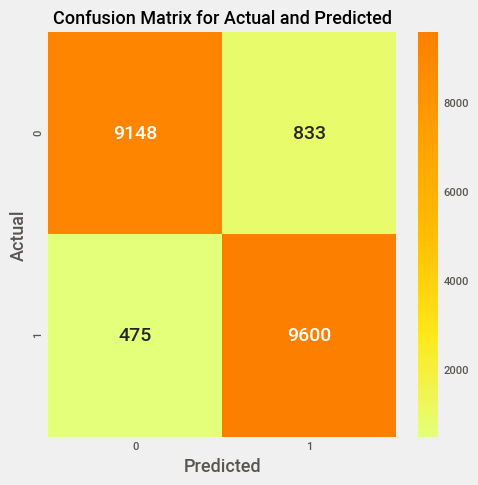

In [270]:
# lets import decision tree clasifier from the sklearn ML package.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

model = DecisionTreeClassifier()
# lets train our model with DecisionTreeClassifier()
model.fit(x_train_ss,y_train)
# lets predict the outcome of the data(x_valid)
y_predict = model.predict(x_valid_ss)


print('Training Accuracy is: ', model.score(x_train_ss,y_train))
print('Testing Accuracy is: ', model.score(x_valid_ss,y_valid))

# anything betweeen 65-75 % is termed as a bad accuracy rate.
# Note: If there is a large difference between Training and Testing Accuracy then it can be called as overfitting.


# lets us make a confusion matrix to understand the actual_target_values with the predicted_values(y_predict).
# Confusion Matrix helps us to analyse the mistakes which are done by our machine learning model.

cm = confusion_matrix(y_valid,y_predict)
plt.rcParams['figure.figsize'] = (5,5)
plt.title("Confusion Matrix for Actual and Predicted", fontsize = 13)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.ylabel('Actual', fontsize = 13)
plt.xlabel('Predicted', fontsize = 13)
plt.show()

# Feature Selection for Decision Tree Model.
* Feature selection for Decision Tree Model helps us to select which features are helping our model to get good predictions and which are not.


In [271]:
import warnings
warnings.filterwarnings('ignore')

# lets import feature_selection from sklearn package.
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
# RFECV -> Recursive Feature Elimination Cross Validation, which checks each column in our dataset and validates whether that column is contributing to a good prediction outcome,
# if it is not, then that particular column is removed form the dataset.

model = DecisionTreeClassifier() 
dt_model = model.fit(x_train_ss, y_train)
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecvv = rfecv.fit(x_train_ss, y_train)

print('Optimal number of features :', rfecvv.n_features_)
# the optimal features always varies whenever we execute our cell, so this might impact our predictions too.
x_trainn = pd.DataFrame(x_train_ss)
print('Best features :', x_trainn.columns[rfecvv.support_])

Optimal number of features : 11
Best features : Int64Index([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


In [272]:
# Classification_Report
cr = classification_report(y_valid,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9981
           1       0.92      0.95      0.94     10075

    accuracy                           0.93     20056
   macro avg       0.94      0.93      0.93     20056
weighted avg       0.94      0.93      0.93     20056



In [273]:
print(f1_score(y_valid, y_predict))

0.9362200117027502


In [274]:
print(precision_score(y_valid, y_predict))

0.9201571935205598


In [275]:
print(recall_score(y_valid, y_predict))

0.9528535980148883


In [276]:
print(accuracy_score(y_valid, y_predict))

0.9347826086956522


In [277]:
### Feature Importances

In [278]:
f_imp = dt_model.feature_importances_
print(f_imp)
for i,v in enumerate(f_imp):
   print('Feature: %0d, Score: %.5f' % (i,v))

[0.11649748 0.01122996 0.01497951 0.00344758 0.09492855 0.08308926
 0.07321911 0.04170293 0.0052134  0.15609679 0.34498676 0.05460867]
Feature: 0, Score: 0.11650
Feature: 1, Score: 0.01123
Feature: 2, Score: 0.01498
Feature: 3, Score: 0.00345
Feature: 4, Score: 0.09493
Feature: 5, Score: 0.08309
Feature: 6, Score: 0.07322
Feature: 7, Score: 0.04170
Feature: 8, Score: 0.00521
Feature: 9, Score: 0.15610
Feature: 10, Score: 0.34499
Feature: 11, Score: 0.05461


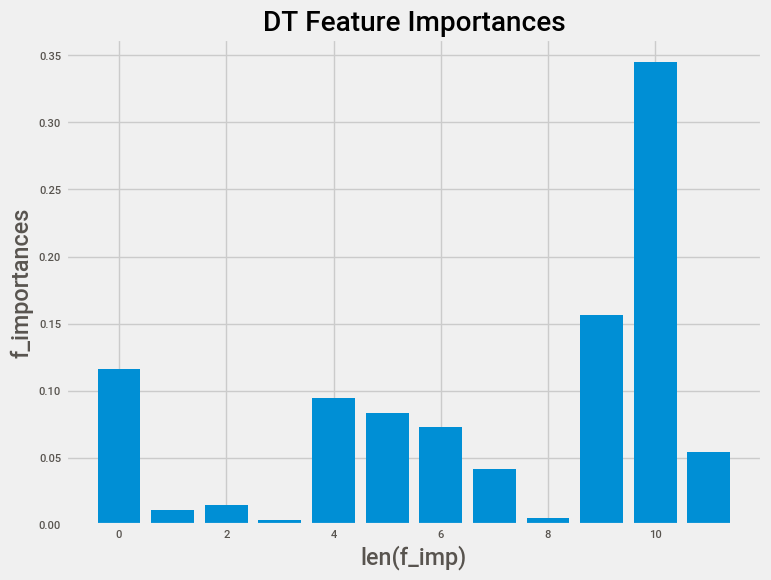

In [279]:
plt.figure(figsize =(8,6), dpi = 100)
plt.bar([i for i in range(len(f_imp))], f_imp)
plt.xlabel('len(f_imp)')
plt.ylabel('f_importances')
plt.title('DT Feature Importances')
plt.show()

In [280]:
### **Logistic Regression**

In [281]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_ss, y_train)
lg_pred = lg.predict(x_valid_ss)
predicted_values = lg.predict_proba(x_valid_ss)

In [282]:
print('Training Accuracy:', lg.score(x_train_ss, y_train))

Training Accuracy: 0.7651949541284404


In [283]:
recall_score(y_valid, lg_pred)

0.7515632754342432

In [284]:
precision_score(y_valid,lg_pred)

0.7678734408275023

In [285]:
f1_score(y_valid,lg_pred)

0.7596308186195826

In [286]:
accuracy_score(y_valid, lg_pred)

0.7610690067810132

In [287]:
print(classification_report(y_valid,lg_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9981
           1       0.77      0.75      0.76     10075

    accuracy                           0.76     20056
   macro avg       0.76      0.76      0.76     20056
weighted avg       0.76      0.76      0.76     20056



In [288]:
#### Feature Importance

In [289]:
f_imp = lg.coef_[0]
print(f_imp)
for i,v in enumerate(f_imp):
   print('Feature: %0d, Score: %.5f' % (i,v))

[  0.23218607  -0.2228566   -0.28924907  -0.16796974  -0.1003066
 -17.70208733   0.04082329  -7.00699917  -2.37967669   0.53517977
  22.22353118   0.05986082]
Feature: 0, Score: 0.23219
Feature: 1, Score: -0.22286
Feature: 2, Score: -0.28925
Feature: 3, Score: -0.16797
Feature: 4, Score: -0.10031
Feature: 5, Score: -17.70209
Feature: 6, Score: 0.04082
Feature: 7, Score: -7.00700
Feature: 8, Score: -2.37968
Feature: 9, Score: 0.53518
Feature: 10, Score: 22.22353
Feature: 11, Score: 0.05986


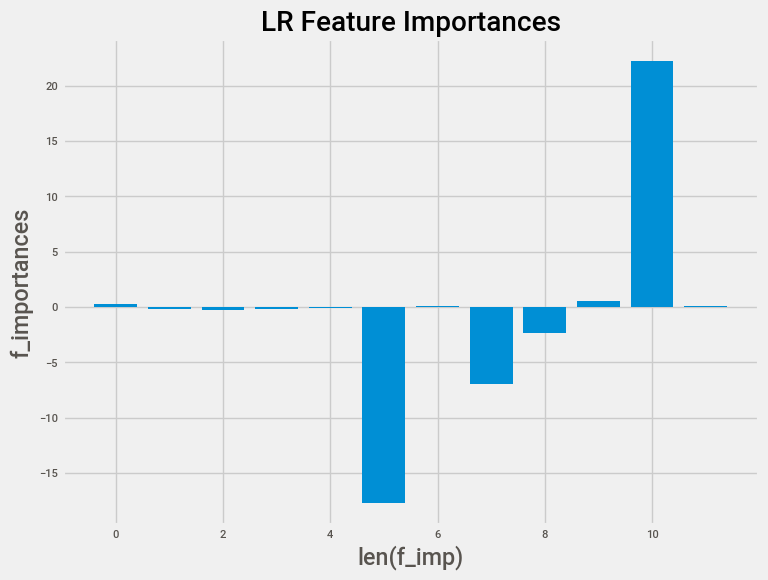

In [290]:
plt.figure(figsize =(8,6), dpi = 100)
plt.bar([i for i in range(len(f_imp))], f_imp)
plt.xlabel('len(f_imp)')
plt.ylabel('f_importances')
plt.title('LR Feature Importances')
plt.show()

In [291]:
### Performing Cross Validation to check the Min Accuracy

In [292]:
x = pd.DataFrame(data = x_train_ss, columns = mustang.columns)
y = y_train
from sklearn.model_selection import  StratifiedKFold
accuracy1 = []
skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
  print('Train:', train_index, 'Validation',test_index)
  x1_train,x1_test = x.iloc[train_index],x.iloc[test_index]
  y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
  lg.fit(x1_train,y1_train)
  pred = lg.predict(x1_test)
  score = accuracy_score(pred,y1_test)
  accuracy1.append(score)
print(accuracy1)

Train: [ 7916  7918  7920 ... 80221 80222 80223] Validation [   0    1    2 ... 8134 8138 8139]
Train: [    0     1     2 ... 80221 80222 80223] Validation [ 7916  7918  7920 ... 16062 16063 16066]
Train: [    0     1     2 ... 80221 80222 80223] Validation [16027 16029 16031 ... 24280 24282 24289]
Train: [    0     1     2 ... 80221 80222 80223] Validation [23892 23893 23895 ... 32177 32178 32179]
Train: [    0     1     2 ... 80221 80222 80223] Validation [31996 31997 31998 ... 40289 40290 40292]
Train: [    0     1     2 ... 80221 80222 80223] Validation [39950 39952 39953 ... 48147 48150 48151]
Train: [    0     1     2 ... 80221 80222 80223] Validation [48123 48124 48126 ... 56169 56171 56172]
Train: [    0     1     2 ... 80221 80222 80223] Validation [56144 56145 56147 ... 64182 64183 64184]
Train: [    0     1     2 ... 80221 80222 80223] Validation [64168 64173 64177 ... 72200 72205 72206]
Train: [    0     1     2 ... 72200 72205 72206] Validation [72197 72201 72202 ... 80221

In [293]:
### Hyper Parameter Tuning

In [294]:
lo = LogisticRegression()
lo

LogisticRegression()

In [295]:
parameters = {'penalty':['l1','l2','elasticnet','none'],
              'solver':['newton-cg','lbfgs','sag','saga'],
              'max_iter':[i for i in range(100,2000,100)], 
              'warm_start':['True','False']}


In [296]:
lg_tuned_model = RandomizedSearchCV(estimator=lo, param_distributions = parameters, scoring='accuracy', n_jobs = -1, cv = 10, n_iter = 10, verbose = 2, random_state = 50)

In [297]:
lg_tuned_model.fit(x_train_ss,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400,
                                                     1500, 1600, 1700, 1800,
                                                     1900],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga'],
                                        'warm_start': ['True', 'False']},
                   random_state=50, scoring='accuracy', verbose=2)

In [298]:
lg_tuned_model.best_params_

{'warm_start': 'True', 'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 300}

In [299]:
lg_tuned_model.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400,
                                                     1500, 1600, 1700, 1800,
                                                     1900],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga'],
                                        'warm_start': ['True', 'False']},
                   random_state=50, scoring='accuracy', verbose=2)>

In [300]:
lg_tuned_model.best_score_

0.7694829558984512

In [301]:
### **Random Forest Classifier**

In [302]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_ss, y_train)
rf_pred = rf.predict(x_valid_ss)

In [303]:
print("Training accuracy is", rf.score(x_train_ss, y_train))
print('Testing Accuracy is', rf.score(x_valid_ss, y_valid))
print(accuracy_score(y_valid, rf_pred))

Training accuracy is 0.9907384323893099
Testing Accuracy is 0.950538492221779
0.950538492221779


In [304]:
print(confusion_matrix(y_valid, rf_pred))

[[9388  593]
 [ 399 9676]]


In [305]:
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      9981
           1       0.94      0.96      0.95     10075

    accuracy                           0.95     20056
   macro avg       0.95      0.95      0.95     20056
weighted avg       0.95      0.95      0.95     20056



In [306]:
recall_score(y_valid, rf_pred)

0.9603970223325062

In [307]:
precision_score(y_valid, rf_pred)

0.9422533839711754

In [308]:
f1_score(y_valid, rf_pred)

0.9512386944553677

In [309]:
#### Feature Importance

In [310]:
fe_imp = rf.feature_importances_
for i,v in enumerate(fe_imp):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08032
Feature: 1, Score: 0.01307
Feature: 2, Score: 0.01846
Feature: 3, Score: 0.00962
Feature: 4, Score: 0.11141
Feature: 5, Score: 0.14590
Feature: 6, Score: 0.07635
Feature: 7, Score: 0.06258
Feature: 8, Score: 0.00419
Feature: 9, Score: 0.13421
Feature: 10, Score: 0.24424
Feature: 11, Score: 0.09964


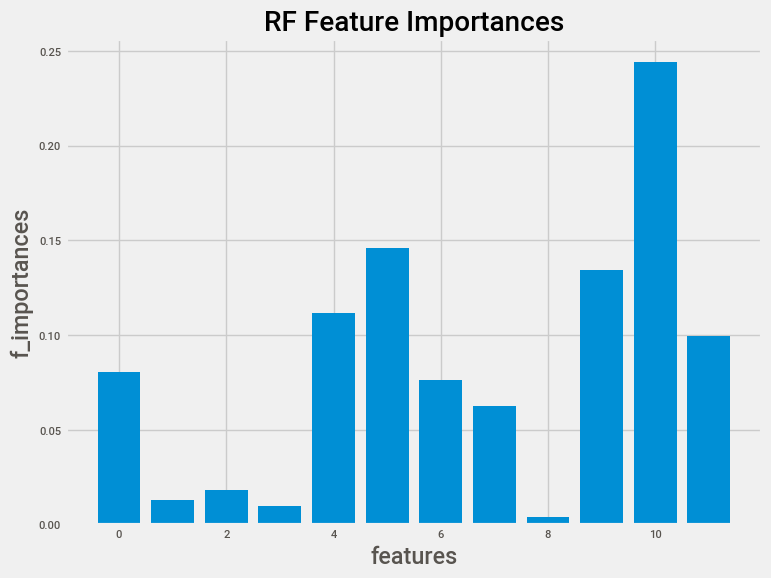

In [311]:
plt.figure(figsize =(8,6), dpi = 100)
plt.bar([i for i in range(len(fe_imp))], fe_imp)
plt.xlabel('features')
plt.ylabel('f_importances')
plt.title('RF Feature Importances')
plt.show()

In [312]:
mustang.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,3.0,73


In [313]:
### Performing Cross Validation on RFC.

In [314]:
x = pd.DataFrame(data = x_train_ss, columns = mustang.columns)
y = y_train
from sklearn.model_selection import  StratifiedKFold
accuracy2 = []
skf = StratifiedKFold(n_splits = 10, random_state = None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
  print('Train:', train_index, 'Validation',test_index)
  x1_train,x1_test = x.iloc[train_index],x.iloc[test_index]
  y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
  rf.fit(x1_train,y1_train)
  pred = rf.predict(x1_test)
  score = accuracy_score(pred,y1_test)
  accuracy2.append(score)
print(accuracy2)

Train: [ 7916  7918  7920 ... 80221 80222 80223] Validation [   0    1    2 ... 8134 8138 8139]
Train: [    0     1     2 ... 80221 80222 80223] Validation [ 7916  7918  7920 ... 16062 16063 16066]
Train: [    0     1     2 ... 80221 80222 80223] Validation [16027 16029 16031 ... 24280 24282 24289]
Train: [    0     1     2 ... 80221 80222 80223] Validation [23892 23893 23895 ... 32177 32178 32179]
Train: [    0     1     2 ... 80221 80222 80223] Validation [31996 31997 31998 ... 40289 40290 40292]
Train: [    0     1     2 ... 80221 80222 80223] Validation [39950 39952 39953 ... 48147 48150 48151]
Train: [    0     1     2 ... 80221 80222 80223] Validation [48123 48124 48126 ... 56169 56171 56172]
Train: [    0     1     2 ... 80221 80222 80223] Validation [56144 56145 56147 ... 64182 64183 64184]
Train: [    0     1     2 ... 80221 80222 80223] Validation [64168 64173 64177 ... 72200 72205 72206]
Train: [    0     1     2 ... 72200 72205 72206] Validation [72197 72201 72202 ... 80221

In [315]:
## Lets check the Descriptive Stats for all the columns and Perform Some Real TIme Predictions.

In [316]:
dodge.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000,54806.000000
mean,4.972722,2.257636,0.702368,1.250684,34.804127,3.304565,5.865599,0.351987,0.023173,63.386947,0.085137,3.679725,79.771430
std,2.506061,0.469723,0.457221,0.589462,7.660219,1.214712,4.265138,0.477594,0.150453,13.371764,0.279088,1.463326,43.879739
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,4.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,5.000000,84.000000
max,8.000000,3.000000,1.000000,5.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.000000,710.000000


In [317]:
# lets perform some Real time predictions on top of the Model that we just created using Decision Tree Classifier.

# lets check the parameters we have in our Model
'''

department            -> The values are from 0 to 8, (Department does not matter a lot for promotion)
education             -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1
gender                -> the values are 0 for female, and 1 for male
no_of_trainings       -> the values are from 0 to 5
age                   -> the values are from 20 to 60
previou_year_rating   -> The values are from 1 to 5
length_of service     -> The values are from 1 to 37
KPIs_met >80%         -> 0 for Not Met and 1 for Met
awards_won>           -> 0-no, and 1-yes
avg_training_score    -> ranges from 40 to 99
sum_metric            -> ranges from 1 to 7
total_score           -> 40 to 710

'''

'\n\ndepartment            -> The values are from 0 to 8, (Department does not matter a lot for promotion)\neducation             -> The values are from 0 to 3 where Masters-> 3, Btech -> 2, and secondary ed -> 1\ngender                -> the values are 0 for female, and 1 for male\nno_of_trainings       -> the values are from 0 to 5\nage                   -> the values are from 20 to 60\npreviou_year_rating   -> The values are from 1 to 5\nlength_of service     -> The values are from 1 to 37\nKPIs_met >80%         -> 0 for Not Met and 1 for Met\nawards_won>           -> 0-no, and 1-yes\navg_training_score    -> ranges from 40 to 99\nsum_metric            -> ranges from 1 to 7\ntotal_score           -> 40 to 710\n\n'

In [318]:
# Note: the prediction varies whenever we execute the block of cells.

predictions = rfecvv.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      99, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))
print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", predictions)
    



Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [0]


In [319]:
## **Predictions on Test Data.**

In [320]:
test_predictions = rfecvv.predict(test_data)

In [321]:
predict_df = pd.DataFrame(test_predictions)

In [322]:
predict_df

,0
0,0
1,0
2,1
3,0
4,0
...,...
23485,0
23486,0
23487,0
23488,0


**Concat test_data with the predictions.**

In [323]:
queen = pd.concat([charger,predict_df], axis = 1)

In [324]:
queen.rename(columns={0:'is_promoted'}, inplace = True)

In [325]:
queen.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score,is_promoted
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77,0
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51,0
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47,1
3,5,2,0,3,31,2.0,9,0,0,65,2.0,195,0
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61,0


In [326]:
queen[queen['is_promoted'] == 1]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score,is_promoted
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47,1
22,8,3,1,1,30,1.0,3,0,0,83,1.0,83,1
28,4,2,1,1,52,1.0,10,0,0,61,1.0,61,1
31,7,2,1,2,43,1.0,14,0,0,52,1.0,104,1
37,7,2,0,2,42,1.0,3,1,0,46,2.0,92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23451,8,3,1,1,33,1.0,2,0,0,80,1.0,80,1
23455,7,3,0,2,42,1.0,13,0,0,48,1.0,96,1
23458,7,2,1,1,44,1.0,17,0,0,48,1.0,48,1
23464,0,2,1,2,25,1.0,2,1,0,83,2.0,166,1
